## Analysis of rose data from Garden.org

In [179]:
# importing lib

import numpy as np 
import pandas as pd 
import json
import os
import fnmatch
import re
import csv
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
%matplotlib inline

In [78]:
# stopping Jupyter outputting truncated results
pd.options.display.max_rows = 1000

pd.set_option('display.max_columns', 500)

pd.set_option('display.width', 1000)

In [79]:
# importing data
df = pd.read_csv('rose_scrape_garden_org_final.csv')

In [80]:
# close look at top 5 rowsof data
df.head(5)

Name                                                URL  Alternative_Cultivar_Names Awards Awards_from_Data_Specific_to_Roses  Count_of_Alternative_Names   Bloom size            Bloom shape            Petal count         Rose bloom color Extra Bloom Info Rebloom       Class              Extra Color Info                    Growth Habit Fragrance                Hybridizer & year   Optimal growing zones Plant Habit Life cycle Sun Requirements                                Soil pH Preferences Plant Height Plant Spread     Leaves          Flowers Flower Color                                        Flower Time        Uses Wildlife Attractant                      Miscellaneous                                          Parentage                                         Containers Child plants
0   Anna-Zinkeisen  https://garden.org/plants/view/1736/Rose-Rosa-...  Anna Zinkeisen, HARquhling    NaN                                NaN                         2.0  Medium: 2-3                    NaN     full: 26-40 petals             Light yellow   Ruffled petals    Some       Shrub                           NaN    Medium-tall, 4-5 feet, bushy    Strong                   Harkness, 1982                     NaN       Shrub  Perennial         Full Sun  Moderately acid (5.6 – 6.0)\nSlightly acid (6....     4-5 feet       3 feet  Deciduous  Showy\nFragrant       Yellow  Late spring or early summer\nLate summer or ea...  Cut Flower                Bees  With thorns/spines/prickles/teeth  (((Chinatown x Golden Masterpiece) x (Super St...                                                NaN          NaN
1       Excellence  https://garden.org/plants/view/2740/Rose-Rosa-...                         NaN    NaN                                NaN                         NaN   Large: 4-5                    NaN     full: 26-40 petals                 Dark red              NaN    Good  Hybrid tea                           NaN                             NaN      Mild                 O.L. Weeks, 2003                     NaN       Shrub  Perennial         Full Sun  Moderately acid (5.6 – 6.0)\nSlightly acid (6....          NaN          NaN  Deciduous  Showy\nFragrant          Red                               Spring\nSummer\nFall  Cut Flower                Bees  With thorns/spines/prickles/teeth                                                NaN                                                NaN          NaN
2       Trump-Card  https://garden.org/plants/view/4269/Rose-Rosa-...                         NaN    NaN                                NaN                         NaN   Large: 4-5          High-centered     full: 26-40 petals               Pink blend              NaN    Good  Hybrid tea  Magenta, with yellow reverse  Medium-tall, 4-5 feet, upright      None  Discovered by Cliff Orent, 2003                     NaN         NaN        NaN              NaN                                                NaN          NaN          NaN        NaN              NaN          NaN                                                NaN         NaN                 NaN                                NaN                                                NaN                                                NaN          NaN
3  Daniela-Kordana  https://garden.org/plants/view/695573/Rose-Ros...  Daniela Kordana, KORpolare    NaN                                NaN                         2.0  Medium: 2-3  Other: Cupped to flat  very full: 40+ petals                 Dark red              NaN    Good   Miniature                           NaN  Very short, 8-10 inches, bushy       NaN         Tim Hermann Kordes, 2000                     NaN       Shrub  Perennial         Full Sun  Moderately acid (5.6 – 6.0)\nSlightly acid (6....  8-10 inches  8-10 inches  Deciduous            Showy          Red                               Spring\nSummer\nFall  Cut Flower                Bees  With thorns/spines/prickles/teeth                   Vanilla Kordana x Scarlet Parade  Suitable in 3 gallon or larger\n

In [81]:
# overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                7069 non-null   object 
 1   URL                                 7072 non-null   object 
 2   Alternative_Cultivar_Names          4488 non-null   object 
 3   Awards                              47 non-null     object 
 4   Awards_from_Data_Specific_to_Roses  337 non-null    object 
 5   Count_of_Alternative_Names          4484 non-null   float64
 6   Bloom size                          6538 non-null   object 
 7   Bloom shape                         3858 non-null   object 
 8   Petal count                         6531 non-null   object 
 9   Rose bloom color                    6529 non-null   object 
 10  Extra Bloom Info                    3352 non-null   object 
 11  Rebloom                             6517 no

### Value counts on each column in the dataset

In [82]:
df['Hybridizer & year'].value_counts()

Unknown                            114
Dr. Griffith J. Buck, 1984          29
Dr. Keith W. Zary, 1998             26
Harkness, 1998                      17
George Michael Shoup, 2006          15
                                  ... 
Meilland International, 1965         1
Niels Dines Poulsen, 1962            1
Harkness, 1976                       1
Eva Schmitz (Canada, 2010            1
David C. H. Austin, before 2005      1
Name: Hybridizer & year, Length: 4009, dtype: int64

In [83]:
df['Rose bloom color'].value_counts()

Pink blend                            882
White and white blend                 703
Medium pink                           545
Light pink                            450
Orange and orange blend               426
Medium red                            419
Mauve and mauve blend                 418
Yellow blend                          394
Apricot and apricot blend             388
Red blend                             342
Deep pink                             330
Dark red                              309
Orange pink                           253
Medium yellow                         225
Orange red                            142
Light yellow                          133
Deep yellow                           109
Russet                                 59
White and white blend\nMedium pink      1
White and white blend\nLight pink       1
Name: Rose bloom color, dtype: int64

In [84]:
df['Flower Color'].value_counts()

Pink                                                 1897
Red                                                   770
Yellow                                                588
White                                                 482
Orange                                                383
Other: Apricot blend                                  365
Mauve                                                 223
Bi-Color: Pink and white                              183
Other: Orange-pink                                    171
Bi-Color: White and pink                              157
Bi-Color: Red and white                               153
Bi-Color: Yellow and pink                             105
Bi-Color: Orange and yellow                           104
Purple                                                 97
Bi-Color: Red and yellow                               73
Bi-Color: Yellow and red                               55
Bi-Color: Pink and yellow                              54
Lavender      

In [85]:
df['Uses'].value_counts()

Cut Flower                                                         6538
Windbreak or Hedge\nCut Flower                                      192
Groundcover\nCut Flower                                             141
Medicinal Herb\nCut Flower                                            1
Groundcover\nCut Flower\nDried Flower                                 1
Windbreak or Hedge\nErosion control\nMedicinal Herb\nCut Flower       1
Windbreak or Hedge\nMedicinal Herb\nCut Flower\nWill Naturalize       1
Cut Flower\nWill Naturalize                                           1
Medicinal Herb\nCut Flower\nWill Naturalize                           1
Cut Flower\nDried Flower                                              1
Name: Uses, dtype: int64

In [86]:
df['Wildlife Attractant'].value_counts()

Bees                                      6728
Bees\nButterflies                          145
Bees\nBirds\nButterflies                     3
Bees\nOther Beneficial Insects               1
Bees\nBirds\nButterflies\nHummingbirds       1
Name: Wildlife Attractant, dtype: int64

In [87]:
df['Flowers'].value_counts()

Showy\nFragrant                        5571
Showy                                  1303
Showy\nMalodorous                         3
Showy\nFragrant\nBlooms on new wood       1
Showy\nFragrant\nBlooms on old wood       1
Name: Flowers, dtype: int64

In [88]:
df['Plant Habit'].value_counts()

Shrub    6879
Name: Plant Habit, dtype: int64

In [89]:
df['Life cycle'].value_counts()

Perennial    6879
Name: Life cycle, dtype: int64

In [90]:
df['Sun Requirements'].value_counts()

Full Sun                                                         6738
Full Sun\nFull Sun to Partial Shade                               139
Full Sun\nFull Sun to Partial Shade\nPartial or Dappled Shade       1
Full Sun to Partial Shade                                           1
Name: Sun Requirements, dtype: int64

In [91]:
df['Rebloom'].value_counts()

Good         5291
Some          562
None          529
Excellent     135
Name: Rebloom, dtype: int64

In [92]:
df['Class'].value_counts()

Hybrid tea                                                                                                         1430
Floribunda                                                                                                         1230
Shrub                                                                                                               949
Miniature                                                                                                           508
Large-flowered climber                                                                                              213
Grandiflora                                                                                                         151
Gallica                                                                                                             119
Hybrid perpetual                                                                                                    108
Polyantha                               

In [93]:
df['Bloom size'].value_counts()

Medium: 2-3              2965
Large: 4-5               2538
Small: under 2            899
Very large: 6 or more     136
Name: Bloom size, dtype: int64

In [94]:
df['Bloom shape'].value_counts()

High-centered                                1668
Cupped                                        847
Flat                                          343
Globular                                      209
Other: Rosette                                148
Other: Cupped to flat                         125
Other: Saucer-shaped                          114
Other: Quartered                               90
Other: Lightly cupped                          66
Other: Button eye                              54
Other: Lax petals                              48
Other: Pompon                                  25
Other: Dahlia-like arrangement of petals       23
Other: Reflexed petals                         16
Cupped\nOther: Quartered                       14
Other: Quartered, with button eye               8
Other: Ruffled petals                           7
Other: Rosette, button eye                      3
High-centered\nOther: Reflexed petals           3
Other: Scalloped petals                         3


In [95]:
df['Petal count'].value_counts()

full: 26-40 petals                                3299
double: 16-25 petals                              1276
very full: 40+ petals                              945
semi-double: 8-15 petals                           578
Single: 1-7 petals                                 428
very full: 40+ petals\nOther: Up to 170 petals       1
semi-double: 8-15 petals\ndouble: 16-25 petals       1
very full: 40+ petals\nOther: 70-80 petals           1
full: 26-40 petals\nOther: Ruffled petals            1
very full: 40+ petals\nOther: Button eye             1
Name: Petal count, dtype: int64

In [96]:
df['Fragrance'].value_counts()

Mild          2443
Strong        1940
Moderate      1352
None           407
None\nMild       1
Name: Fragrance, dtype: int64

In [97]:
df['Optimal growing zones'].value_counts()

USDA zone 6 and warmer     1175
USDA zone 5 and warmer      879
USDA zone 7 and warmer      576
USDA zone 4 and warmer      315
USDA zones 4-8              111
USDA zones 4-9               93
USDA zone 3 and warmer       67
USDA zone 6b and warmer      49
Zone 6b and warmer           40
USDA zone 2 and warmer       36
USDA zones 5-9               32
USDA zones 3-9               25
Zone 5b and warmer           24
USDA zones 4 through 8       20
USDA zones 4 through 9       15
USDA zone 5b and warmer      15
USDA zones 2-8               13
USDA zone 7b and warmer      11
USDA Zones 6 and warmer       8
Zone 7b and warmer            8
Zone 4b and warmer            6
USDA zone 2b and warmer       4
Zone 5 and warmer             3
USDA zones 3-8                3
USDA zones 2-9                3
USDA zone 3b and warmer       2
USDA zones 3 through 9        2
USDA Zones 5 and warmer       2
USDA zones 3 through 8        2
USDA zones 3-7                2
USDA zone 4b and warmer       2
Usda Zon

In [98]:
df['Flower Time'].value_counts()

Spring\nSummer\nFall                                            5301
Late spring or early summer                                      528
Late spring or early summer\nLate summer or early fall           516
Spring\nSummer                                                     2
Late spring or early summer\nOther: early Summer to frost          1
Spring\nSummer\nFall\nOther: Spring to frost                       1
Late summer or early fall\nOther: Early Summer to frost            1
Late spring or early summer\nOther: Early Summer to frost          1
Summer                                                             1
Spring\nLate spring or early summer\nSummer                        1
Late spring or early summer\nLate summer or early fall\nFall       1
Spring\nFall                                                       1
Name: Flower Time, dtype: int64

In [99]:
df['Extra Bloom Info'].value_counts()

In clusters                                                                         1872
In small clusters                                                                    256
In large clusters                                                                    199
Semi-double to double, in clusters                                                   162
Double to full, in clusters                                                          114
Medium to large, in clusters                                                          66
Medium to large                                                                       51
Double to full                                                                        38
Ruffled petals                                                                        38
Single to semi-double, in clusters                                                    36
In clusters, with ruffled petals                                                      32
Semi-double to double

In [100]:
df['Extra Color Info'].value_counts()

White blend                               42
Orange blend                              41
Mauve blend                               37
Salmon-pink                               33
Several shades of pink                    29
                                          ..
Pink, yellow undertones, coral shading     1
Medium-red, with white stripes             1
Apricot, flushed with crimson              1
Lavender, with white edges                 1
White, with pale pink flushes              1
Name: Extra Color Info, Length: 1968, dtype: int64

In [101]:
df['Growth Habit'].value_counts()

Short, 2-3 feet, bushy                                                                                               708
Medium, 3-4 feet, bushy                                                                                              690
Medium, 3-4 feet, upright                                                                                            434
Medium-tall, 4-5 feet, bushy                                                                                         286
Medium-tall, 3-5 feet, bushy                                                                                         181
Short, 2-3 feet, upright                                                                                             169
Medium-tall, 4-5 feet, upright                                                                                       147
Short, 1-2 feet, bushy                                                                                               120
Medium-tall, 3-5 feet, upright  

In [102]:
df['Soil pH Preferences'].value_counts()

Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)    6876
Slightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)                                                                   3
Name: Soil pH Preferences, dtype: int64

In [103]:
df['Plant Height'].value_counts()

3-4 feet                                     1207
2-3 feet                                      979
4-5 feet                                      534
3-5 feet                                      337
1-2 feet                                      321
5-6 feet                                      180
4-6 feet                                      162
5-7 feet                                      114
6-8 feet                                       80
8-10 feet                                      76
2-4 feet                                       63
4-7 feet                                       56
8-12 feet                                      49
10-12 feet                                     48
10 feet                                        47
18-24 inches                                   34
5-8 feet                                       32
4-8 feet                                       31
3-6 feet                                       28
12-18 inches                                   28


In [104]:
df['Plant Spread'].value_counts()

2-3 feet                                   2013
3-4 feet                                    737
1-2 feet                                    523
2 feet                                      442
4-5 feet                                    203
3 feet                                      145
2-4 feet                                    120
3-5 feet                                    108
4-6 feet                                     88
6-8 feet                                     86
5-6 feet                                     81
12-18 inches                                 40
8-10 feet                                    38
4 feet                                       26
10-15 feet                                   26
18-24 inches                                 25
4-7 feet                                     24
5-7 feet                                     23
3-6 feet                                     20
5-8 feet                                     20
6-10 feet                               

In [105]:
df['Leaves'].value_counts()

Deciduous                                      6871
Deciduous\nFragrant                               2
Good fall color\nDeciduous                        2
Deciduous\nVariegated                             1
Unusual foliage color\nDeciduous                  1
Deciduous\nOther: Wrinkled (rugose) foliage       1
Evergreen                                         1
Name: Leaves, dtype: int64

In [106]:
df['Miscellaneous'].value_counts()

With thorns/spines/prickles/teeth                         6477
Tolerates poor soil\nWith thorns/spines/prickles/teeth       2
With thorns/spines/prickles/teeth\nMonoecious                1
Name: Miscellaneous, dtype: int64

In [107]:
df['Parentage'].value_counts()

Unknown                                    648
unknown                                     78
seedling x seedling                         37
Unnamed seedling x unnamed seedling         10
Seedling x Seedling                          9
                                          ... 
Seedling of: Bon Silene                      1
Finest Hour x unnamed seedling               1
Sarabande x Marlena                          1
Colour Wonder x Liberty Bell                 1
Seedling of: Sterling Silver x seedling      1
Name: Parentage, Length: 1985, dtype: int64

In [108]:
df['Containers'].value_counts()

Suitable in 3 gallon or larger\nNeeds repotting every 2 to 3 years\nNeeds excellent drainage in pots                                  710
Not suitable for containers                                                                                                            56
Suitable in 3 gallon or larger\nNeeds repotting every 2 to 3 years                                                                     32
Suitable in 1 gallon\nSuitable in 3 gallon or larger\nNeeds repotting every 2 to 3 years\nNeeds excellent drainage in pots             14
Suitable in 3 gallon or larger\nSuitable for hanging baskets\nNeeds repotting every 2 to 3 years\nNeeds excellent drainage in pots      6
Suitable in 3 gallon or larger\nNeeds excellent drainage in pots                                                                        4
Suitable in 3 gallon or larger                                                                                                          2
Suitable in 1 gallon\nSuitable in 

In [109]:
df['Child plants'].value_counts()

one child plant    540
2 child plants     216
3 child plants     109
4 child plants      63
5 child plants      34
6 child plants      29
7 child plants      20
8 child plants      19
10 child plants     11
12 child plants      7
9 child plants       6
13 child plants      6
14 child plants      6
16 child plants      4
11 child plants      3
20 child plants      3
21 child plants      2
32 child plants      1
25 child plants      1
15 child plants      1
19 child plants      1
22 child plants      1
23 child plants      1
18 child plants      1
24 child plants      1
17 child plants      1
65 child plants      1
Name: Child plants, dtype: int64

### Changes needed to the data to make nice visuals. 

1.) Column ['Hybridizer & year'] contains two distinct bits of information. We want year to be an idependent column.

2.) Column ['Wildlife Attractant'] needs removal of \n. This is also not a very informative data. Mostly roses atract Bees plus other nectar loving incects. 

3.) Column ['Flowers'] needs removal of \n.

4.) Lol. What the point of columns (['Plant Habit'] if it is always populated with Shrub), ['Life cycle'] if it is always populated with Perennial :(

5.) Column ['Sun Requirements'] needs removal of \n.

6.) Column ['Class'] needs removal of \n. Interesting data. 

7.) Column ['Bloom shape'] needs removal of \n, may need extra cleaning. Interesting data. 

8.) Column ['Petal count'] needs removal of \n and other, needs standartizing. We have lots of unique enties that are of no use in this analysis. Interesting data. 

9.) Column ['Flower Time'] needs removal of \n.

10.) Column ['Uses'] needs removal of \n.

11.) Column ['Flower Color'] needs removal of \n.

12.) Column ['Soil pH Preferences'] needs removal of \n.

13.) Column ['Leaves'] needs removal of \n.

14.) Column ['Flower Color'] some times starts with lower case latters. This messes up value counts. 


In [110]:
# extracting year from column ['Hybridizer & year']

df['YEAR'] = df['Hybridizer & year'].str.extract('(\\d{4})', expand=False).str.strip()

df[['YEAR', 'Hybridizer & year']]

YEAR                Hybridizer & year
0     1982                   Harkness, 1982
1     2003                 O.L. Weeks, 2003
2     2003  Discovered by Cliff Orent, 2003
3     2000         Tim Hermann Kordes, 2000
4      NaN                          Unknown
...    ...                              ...
7067  2004               Gareth Fryer, 2004
7068  1918              Alister Clark, 1918
7069  1930     Wilhelm J.H. Kordes II, 1930
7070  1983              Reimer Kordes, 1983
7071  1962            Robert G. Jelly, 1962

[7072 rows x 2 columns]

In [111]:
# extracting Hybridizer from column ['Hybridizer & year']

df['Hybridizer'] = df['Hybridizer & year'].str.extract('([A-Z].+)', expand=False).str.strip()

df['Hybridizer'] = df['Hybridizer'].str.replace('\d+', '')

df['Hybridizer'] = df['Hybridizer'].str.replace(',', '')

df[['YEAR', 'Hybridizer', 'Hybridizer & year']]

YEAR                  Hybridizer                Hybridizer & year
0     1982                   Harkness                    Harkness, 1982
1     2003                 O.L. Weeks                  O.L. Weeks, 2003
2     2003  Discovered by Cliff Orent   Discovered by Cliff Orent, 2003
3     2000         Tim Hermann Kordes          Tim Hermann Kordes, 2000
4      NaN                     Unknown                          Unknown
...    ...                         ...                              ...
7067  2004               Gareth Fryer                Gareth Fryer, 2004
7068  1918              Alister Clark               Alister Clark, 1918
7069  1930     Wilhelm J.H. Kordes II      Wilhelm J.H. Kordes II, 1930
7070  1983              Reimer Kordes               Reimer Kordes, 1983
7071  1962            Robert G. Jelly             Robert G. Jelly, 1962

[7072 rows x 3 columns]

In [112]:
# checking if hybridizer is showing correct info
# value counts ordered alphabetically 
df['Hybridizer'].value_counts().sort_index(ascending=False).head(200)

Zary                                            1
Yoshiho Takatori                                1
Year of discovery unknown                       1
Wood & Ingram                                   1
Wood                                            1
Wm. E.B. Archer & Daughter                      3
Wisconsin Roses                                 1
Wisbech Plant Co. Ltd.                          2
William Wilke                                   1
William Wells                                   1
William Paul before                             1
William Paul and Son circa                      1
William Paul and Son before                     1
William Paul and Son after                      1
William Paul and Son                            1
William Paul                                    9
William Patterson                               1
William J. Radler before                        6
William J. Radler                              20
William Godfrey before                          1


In [113]:
df['Hybridizer'] = df['Hybridizer'].str.replace('before', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('year unknown', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('circa', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Year of discovery unknown', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('after', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('\(Germany', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('\(France', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('\(Canada', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('\(United States', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('\(United Kingdom', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('\(Scotland', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('France', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Jr', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('jr', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Jr.', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Introduced by Jackson & Perkins in', 'Jackson & Perkins')
df['Hybridizer'] = df['Hybridizer'].str.replace('Introducted by ', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('rose introduced by ', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('discovered by ', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Discovered by ', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('introduced by ', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Introduced in ; hybridizer ', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Hybridizer unknown; ', '')
df['Hybridizer'] = df['Hybridizer'].str.replace(' \).', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Bred by unknown hybridizer', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Bred by unknown person ', '')
df['Hybridizer'] = df['Hybridizer'].str.replace(' and ', ' & ')
#df['Hybridizer'] = df['Hybridizer'].str.replace(' .', ' ')
df['Hybridizer'] = df['Hybridizer'].str.replace('(Louisette)', '')
df['Hybridizer'] = df['Hybridizer'].str.replace('Unlimited in', 'Unlimited')
df['Hybridizer'] = df['Hybridizer'].str.replace('Ltd.', 'Ltd')
df['Hybridizer'] = df['Hybridizer'].str.replace('ltd', 'Ltd')
# df['Hybridizer'] = df['Hybridizer'].str.replace('..', '.')

In [183]:
df['Hybridizer'] = df['Hybridizer'].str.replace('Mathias Tantau .', 'Mathias Tantau')

In [180]:
df['Hybridizer'] = df['Hybridizer'].str.strip()

In [181]:
# checking if hybridizer values updated as expected
# value counts ordered alphabetically 
df['Hybridizer'].value_counts().sort_index(ascending=False).head(400)

unknown person unknown year                      1
unknown person                                  10
unknown                                          2
sco Giacomo Paolino                              6
s Grate                                          1
Zary                                             1
Yoshiho Takatori                                 2
Wood & Ingram                                    1
Wood                                             1
Wm. E.B. Archer & Daughter                       3
Witherspoon Rose Culture                         1
Wisconsin Roses                                  1
Wisbech Plant Co. Ltd                            2
Winifred L. Gordon                               1
William Wilke                                    1
William Wells                                    1
William Radler                                   1
William Paul & Son                               4
William Paul                                    11
William Patterson              

In [185]:
# checking if hybridizer values updated as expected
# value counts ordered alphabetically 
df['Hybridizer'].value_counts().sort_index(ascending=True).head(400)

                                                  3
A. Bonnet & Fils                                  1
A. Marshall                                       1
A.J. Miller                                       1
Abel Myard                                        1
Adam                                              1
Adam Paul                                         1
Adolf Horstmann                                   1
Adolphe Burgess                                   1
Aksel Olsen                                       1
Alain Meilland                                   99
Alain Meilland & Michele Meilland Richardier      1
Albert Hoffmann                                   1
Albert Norman                                     7
Alexander Dickson II                             22
Alexander Dickson III                             9
Alexander Hill Gray                               1
Alexander M. (Alec) Cocker                       13
Alexander M. (Alec) Cocker )                      1
Alexander M.

This is much cleaner data for Rose Hybridizer/Breeder, but it is not purfect. 

We still have some spacing issues and name shortening like A. causing issues. 

This can be takled with some fancy name standartisation technigue like fuzzy name matching, fuzzy NLP approach ... or manual correction in excel :( 

Will not bother with this right this minute. 

In [116]:
# 2.) Column ['Wildlife Attractant'] needs removal of \n.

df['Wildlife Attractant'] = df['Wildlife Attractant'].str.replace('\n', ', ')

df['Wildlife Attractant'].value_counts()

Bees                                      6728
Bees, Butterflies                          145
Bees, Birds, Butterflies                     3
Bees, Other Beneficial Insects               1
Bees, Birds, Butterflies, Hummingbirds       1
Name: Wildlife Attractant, dtype: int64

In [117]:
# 3.) Column ['Flowers'] needs removal of \n.

df['Flowers'] = df['Flowers'].str.replace('\n', ', ')

df['Flowers'].value_counts()

Showy, Fragrant                        5571
Showy                                  1303
Showy, Malodorous                         3
Showy, Fragrant, Blooms on old wood       1
Showy, Fragrant, Blooms on new wood       1
Name: Flowers, dtype: int64

In [118]:
# 5.) Column ['Sun Requirements'] needs removal of \n.

df['Sun Requirements'] = df['Sun Requirements'].str.replace('\n', ', ')

df['Sun Requirements'].value_counts()

Full Sun                                                         6738
Full Sun, Full Sun to Partial Shade                               139
Full Sun, Full Sun to Partial Shade, Partial or Dappled Shade       1
Full Sun to Partial Shade                                           1
Name: Sun Requirements, dtype: int64

In [119]:
# 6.) Column ['Class'] needs removal of \n.

df['Class'] = df['Class'].str.replace('\n', ', ')

df['Class'].value_counts()

Hybrid tea                                                                                                         1430
Floribunda                                                                                                         1230
Shrub                                                                                                               949
Miniature                                                                                                           508
Large-flowered climber                                                                                              213
Grandiflora                                                                                                         151
Gallica                                                                                                             119
Hybrid perpetual                                                                                                    108
Polyantha                               

In [120]:
df['Class'] = df['Class'].str.replace('Other: ', '')

df['Class'].value_counts()

Hybrid tea                                                                                                  1430
Floribunda                                                                                                  1230
Shrub                                                                                                        949
Miniature                                                                                                    508
Large-flowered climber                                                                                       213
Grandiflora                                                                                                  151
Gallica                                                                                                      119
Hybrid perpetual                                                                                             108
Polyantha                                                                                       

In [121]:
# 9.) Column ['Flower Time'] needs removal of \n.

df['Flower Time'] = df['Flower Time'].str.replace('\n', ', ')

df['Flower Time'].value_counts()

Spring, Summer, Fall                                            5301
Late spring or early summer                                      528
Late spring or early summer, Late summer or early fall           516
Spring, Summer                                                     2
Late summer or early fall, Other: Early Summer to frost            1
Spring, Summer, Fall, Other: Spring to frost                       1
Late spring or early summer, Other: early Summer to frost          1
Summer                                                             1
Late spring or early summer, Late summer or early fall, Fall       1
Spring, Fall                                                       1
Spring, Late spring or early summer, Summer                        1
Late spring or early summer, Other: Early Summer to frost          1
Name: Flower Time, dtype: int64

In [122]:
df['Flower Color'].value_counts()

Pink                                                 1897
Red                                                   770
Yellow                                                588
White                                                 482
Orange                                                383
Other: Apricot blend                                  365
Mauve                                                 223
Bi-Color: Pink and white                              183
Other: Orange-pink                                    171
Bi-Color: White and pink                              157
Bi-Color: Red and white                               153
Bi-Color: Yellow and pink                             105
Bi-Color: Orange and yellow                           104
Purple                                                 97
Bi-Color: Red and yellow                               73
Bi-Color: Yellow and red                               55
Bi-Color: Pink and yellow                              54
Lavender      

In [123]:
# What color is Pink\nWhite? Lets see images of roses using linked urls

df['URL'].loc[df['Flower Color'] == 'Pink\nWhite']

5956    https://garden.org/plants/view/537339/Wild-Pra...
6087    https://garden.org/plants/view/478177/Rose-Ros...
Name: URL, dtype: object

In [124]:
# 11.) Column ['Flower Color'] needs removal of \n.

df['Flower Color'] = df['Flower Color'].str.replace('\nOther: Green', '')

df['Flower Color'] = df['Flower Color'].str.replace('\nOther:', ', ')

df['Flower Color'] = df['Flower Color'].str.replace('Other: ', '')

df['Flower Color'] = df['Flower Color'].str.replace('pink\n', ', ')

df['Flower Color'] = df['Flower Color'].str.replace('\n', ' ')

df['Flower Color'].value_counts()

Pink                                                 1897
Red                                                   770
Yellow                                                588
White                                                 482
Orange                                                383
Apricot blend                                         365
Mauve                                                 223
Bi-Color: Pink and white                              183
Orange-pink                                           171
Bi-Color: White and pink                              157
Bi-Color: Red and white                               153
Bi-Color: Yellow and pink                             105
Bi-Color: Orange and yellow                           104
Purple                                                 97
Bi-Color: Red and yellow                               73
Bi-Color: Yellow and red                               55
Bi-Color: Pink and yellow                              54
Lavender      

In [125]:
# extracting Bi-Color from column ['Flower Color']

df['Bi-Color'] = df['Flower Color'].str.extract('(Bi-Color:)', expand=False).str.strip()

df['Flower Color'] = df['Flower Color'].str.replace('(Bi-Color: )', '')

df[['Flower Color', 'Bi-Color']].value_counts()

Flower Color                Bi-Color 
Pink and white              Bi-Color:    183
White and pink              Bi-Color:    157
Red and white               Bi-Color:    153
Yellow and pink             Bi-Color:    105
Orange and yellow           Bi-Color:    104
Red and yellow              Bi-Color:     73
Yellow and red              Bi-Color:     55
Pink and yellow             Bi-Color:     54
Yellow and orange           Bi-Color:     45
White and red               Bi-Color:     19
White and yellow            Bi-Color:     15
Pink and cream              Bi-Color:     13
Mauve and white             Bi-Color:     11
Orange and white            Bi-Color:      9
Red and purple              Bi-Color:      9
Orange and pink             Bi-Color:      8
Red and pink                Bi-Color:      7
Pink and apricot            Bi-Color:      6
Pink and red                Bi-Color:      6
Purple and white            Bi-Color:      5
yellow and pink             Bi-Color:      5
Pink and mauve   

In [126]:
# extracting Multi-Color from column ['Flower Color']

df['Multi-Color'] = df['Flower Color'].str.extract('(Multi-Color:)', expand=False).str.strip()

df['Flower Color'] = df['Flower Color'].str.replace('(Multi-Color: )', '')

df[['Flower Color', 'Multi-Color']].value_counts()

Flower Color                          Multi-Color 
Orange, pink, and yellow              Multi-Color:    7
Red, white, and yellow                Multi-Color:    5
Orange, yellow, and pink              Multi-Color:    5
Pink, yellow, and orange              Multi-Color:    4
Orange, apricot, and pink             Multi-Color:    4
Yellow, pink, and orange              Multi-Color:    4
White, pink, and yellow               Multi-Color:    4
Yellow, orange, and pink              Multi-Color:    3
Orange, yellow, and red               Multi-Color:    3
Yellow, pink, and red                 Multi-Color:    3
Pink, yellow, and white               Multi-Color:    2
Red, yellow, and white                Multi-Color:    2
White, pink, and red                  Multi-Color:    2
Pink, red, and white                  Multi-Color:    2
White, yellow, and pink               Multi-Color:    2
Yellow, red, and orange               Multi-Color:    2
Red, cream, and yellow                Multi-Color:   

In [127]:
# removing "Other: '

df['Flower Time'] = df['Flower Time'].str.replace('Other: ', ' ')

df['Flower Time'].value_counts()

Spring, Summer, Fall                                            5301
Late spring or early summer                                      528
Late spring or early summer, Late summer or early fall           516
Spring, Summer                                                     2
Late summer or early fall,  Early Summer to frost                  1
Summer                                                             1
Late spring or early summer, Late summer or early fall, Fall       1
Spring, Fall                                                       1
Spring, Late spring or early summer, Summer                        1
Late spring or early summer,  Early Summer to frost                1
Late spring or early summer,  early Summer to frost                1
Spring, Summer, Fall,  Spring to frost                             1
Name: Flower Time, dtype: int64

In [128]:
# 10.) Column ['Uses needs'] removal of \n.

df['Uses'] = df['Uses'].str.replace('\n', ', ')

df['Uses'].value_counts()

Cut Flower                                                         6538
Windbreak or Hedge, Cut Flower                                      192
Groundcover, Cut Flower                                             141
Groundcover, Cut Flower, Dried Flower                                 1
Cut Flower, Will Naturalize                                           1
Windbreak or Hedge, Medicinal Herb, Cut Flower, Will Naturalize       1
Medicinal Herb, Cut Flower                                            1
Medicinal Herb, Cut Flower, Will Naturalize                           1
Windbreak or Hedge, Erosion control, Medicinal Herb, Cut Flower       1
Cut Flower, Dried Flower                                              1
Name: Uses, dtype: int64

In [129]:
# ['Petal count'] before clean up

df['Petal count'].value_counts()

full: 26-40 petals                                3299
double: 16-25 petals                              1276
very full: 40+ petals                              945
semi-double: 8-15 petals                           578
Single: 1-7 petals                                 428
very full: 40+ petals\nOther: Up to 170 petals       1
semi-double: 8-15 petals\ndouble: 16-25 petals       1
very full: 40+ petals\nOther: 70-80 petals           1
full: 26-40 petals\nOther: Ruffled petals            1
very full: 40+ petals\nOther: Button eye             1
Name: Petal count, dtype: int64

In [130]:
# ['Petal count'] clean up

df['Petal count'] = df['Petal count'].str.replace('\nOther: Button eye', '')
df['Petal count'] = df['Petal count'].str.replace('\nOther: Ruffled petals', '')
df['Petal count'] = df['Petal count'].str.replace('\ndouble: 16-25 petals', '')
df['Petal count'] = df['Petal count'].str.replace('\nOther: Up to 170 petals', '')
df['Petal count'] = df['Petal count'].str.replace('\nOther: 70-80 petals', '')

df['Petal count'].value_counts()

full: 26-40 petals          3300
double: 16-25 petals        1276
very full: 40+ petals        948
semi-double: 8-15 petals     579
Single: 1-7 petals           428
Name: Petal count, dtype: int64

In [131]:
df['Bloom shape'].value_counts()

High-centered                                1668
Cupped                                        847
Flat                                          343
Globular                                      209
Other: Rosette                                148
Other: Cupped to flat                         125
Other: Saucer-shaped                          114
Other: Quartered                               90
Other: Lightly cupped                          66
Other: Button eye                              54
Other: Lax petals                              48
Other: Pompon                                  25
Other: Dahlia-like arrangement of petals       23
Other: Reflexed petals                         16
Cupped\nOther: Quartered                       14
Other: Quartered, with button eye               8
Other: Ruffled petals                           7
Other: Rosette, button eye                      3
High-centered\nOther: Reflexed petals           3
Other: Scalloped petals                         3


In [132]:
df['Bloom shape'] = df['Bloom shape'].str.replace('\nOther:', ', ')

df['Bloom shape'] = df['Bloom shape'].str.replace('Other: ', '')

df['Bloom shape'] = df['Bloom shape'].str.replace('\n', ', ')

df['Bloom shape'].value_counts()

High-centered                          1668
Cupped                                  847
Flat                                    343
Globular                                209
Rosette                                 148
Cupped to flat                          125
Saucer-shaped                           114
Quartered                                90
Lightly cupped                           66
Button eye                               54
Lax petals                               48
Pompon                                   25
Dahlia-like arrangement of petals        23
Reflexed petals                          16
Cupped,  Quartered                       14
Quartered, with button eye                8
Ruffled petals                            7
High-centered,  Reflexed petals           3
Rosette, button eye                       3
Cupped,  Button eye                       3
Scalloped petals                          3
Globular,  Lax petals                     2
Cupped, Flat                    

In [133]:
df['Flowers'] = df['Flowers'].str.replace('\n', ', ')

df['Flowers'].value_counts()

Showy, Fragrant                        5571
Showy                                  1303
Showy, Malodorous                         3
Showy, Fragrant, Blooms on old wood       1
Showy, Fragrant, Blooms on new wood       1
Name: Flowers, dtype: int64

In [134]:
# 12.) Column ['Soil pH Preferences'] needs removal of \n.

df['Soil pH Preferences'] = df['Soil pH Preferences'].str.replace('\n', ', ')

df['Soil pH Preferences'].value_counts()

Moderately acid (5.6 – 6.0), Slightly acid (6.1 – 6.5), Neutral (6.6 – 7.3), Slightly alkaline (7.4 – 7.8)    6876
Slightly acid (6.1 – 6.5), Neutral (6.6 – 7.3)                                                                   3
Name: Soil pH Preferences, dtype: int64

In [135]:
# 13.) Column ['Leaves'] needs removal of \n.

df['Leaves'] = df['Leaves'].str.replace('\n', ', ')

df['Leaves'].value_counts()

Deciduous                                      6871
Deciduous, Fragrant                               2
Good fall color, Deciduous                        2
Deciduous, Variegated                             1
Unusual foliage color, Deciduous                  1
Evergreen                                         1
Deciduous, Other: Wrinkled (rugose) foliage       1
Name: Leaves, dtype: int64

In [136]:
# 14.) Column ['Flower Color'] some times starts with lower case latters. This messes up value counts.  


df['Flower Color2'] = df['Flower Color'].str.capitalize()

df['Flower Color'] = df['Flower Color'].str.title()

df[['Flower Color', 'Flower Color2']].value_counts()


Flower Color                          Flower Color2                       
Pink                                  Pink                                    1897
Red                                   Red                                      770
Yellow                                Yellow                                   588
White                                 White                                    482
Orange                                Orange                                   383
Apricot Blend                         Apricot blend                            365
Mauve                                 Mauve                                    223
Pink And White                        Pink and white                           184
Orange-Pink                           Orange-pink                              172
White And Pink                        White and pink                           158
Red And White                         Red and white                            155
Yellow And P

In [137]:
# 15.) Column ['Rose bloom color'] some times in lower case latters and sometimes with capitals . This messes up value counts.  

df['Rose bloom color'] = df['Rose bloom color'].str.title()

df['Rose bloom color'] = df['Rose bloom color'].str.replace('\n', ', ')

df[['Rose bloom color']].value_counts()

Rose bloom color                  
Pink Blend                            882
White And White Blend                 703
Medium Pink                           545
Light Pink                            450
Orange And Orange Blend               426
Medium Red                            419
Mauve And Mauve Blend                 418
Yellow Blend                          394
Apricot And Apricot Blend             388
Red Blend                             342
Deep Pink                             330
Dark Red                              309
Orange Pink                           253
Medium Yellow                         225
Orange Red                            142
Light Yellow                          133
Deep Yellow                           109
Russet                                 59
White And White Blend, Medium Pink      1
White And White Blend, Light Pink       1
dtype: int64

### Ideas for next steps


1.) How many roses have more than one name?

2.) Compare contents of color columns. 


111.) Create visual - bubble chart over time on rose colors and year created & class and year created.



####  1.) How many roses have more than one name?

In [138]:
# 1.) How many roses have more than one name?

df['Count_of_Alternative_Names'].value_counts()

2.0     2739
3.0      979
4.0      343
5.0      199
6.0       89
7.0       63
8.0       15
9.0       13
11.0      10
13.0       9
10.0       8
12.0       3
14.0       3
20.0       2
15.0       2
17.0       2
21.0       1
16.0       1
22.0       1
18.0       1
19.0       1
Name: Count_of_Alternative_Names, dtype: int64

#### 2.) Compare contents of color columns.

In this dataset we have three columns that describe rose color: 

- 'Rose bloom color'
- 'Flower Color'
- 'Extra Color Info'

Let's have a look what column is better populated. 

In [139]:
df[['Rose bloom color', 'Flower Color', 'Extra Color Info']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rose bloom color  6529 non-null   object
 1   Flower Color      6392 non-null   object
 2   Extra Color Info  3275 non-null   object
dtypes: object(3)
memory usage: 165.9+ KB


In [140]:
# Number of unique entries in column ['Rose bloom color']

df['Rose bloom color'].nunique()

20

In [141]:
# Number of unique entries in column ['Flower Color']

df['Flower Color'].nunique()

171

In [142]:
# Number of unique entries in column ['Extra Color Info']

df['Extra Color Info'].nunique()

1968

In [143]:
# 2.) Compare contents of color columns.

df[['Rose bloom color', 'Flower Color']].value_counts()

Rose bloom color                    Flower Color                        
Pink Blend                          Pink                                    556
Medium Pink                         Pink                                    528
White And White Blend               White                                   478
Light Pink                          Pink                                    436
Medium Red                          Red                                     405
Apricot And Apricot Blend           Apricot Blend                           359
Deep Pink                           Pink                                    319
Dark Red                            Red                                     294
Orange And Orange Blend             Orange                                  244
Mauve And Mauve Blend               Mauve                                   222
Medium Yellow                       Yellow                                  215
Pink Blend                          Pink And Wh

In [144]:
df[['Flower Color', 'Rose bloom color']].value_counts()

Flower Color                          Rose bloom color                  
Pink                                  Pink Blend                            556
                                      Medium Pink                           528
White                                 White And White Blend                 478
Pink                                  Light Pink                            436
Red                                   Medium Red                            405
Apricot Blend                         Apricot And Apricot Blend             359
Pink                                  Deep Pink                             319
Red                                   Dark Red                              294
Orange                                Orange And Orange Blend               244
Mauve                                 Mauve And Mauve Blend                 222
Yellow                                Medium Yellow                         215
Pink And White                        Pink Blen

In [145]:
df[['Rose bloom color', 'Flower Color', 'Extra Color Info']].value_counts()

Rose bloom color           Flower Color     Extra Color Info                                  
White And White Blend      White            White blend                                           41
Orange And Orange Blend    Orange           Orange blend                                          35
Pink Blend                 Pink             Several shades of pink                                29
Mauve And Mauve Blend      Mauve            Mauve blend                                           28
Light Pink                 Pink             Light pink                                            22
                                                                                                  ..
Pink Blend                 Pink And Yellow  Pink, yellow, orange blend                             1
                                            Salmon-pink and yellow blend                           1
                                            Salmon-pink blend, with yellow and buff highlights   

In [146]:
# Where 'Flower Color' is blank but 'Rose bloom color' is populated

df[['Flower Color', 'Rose bloom color', 'Extra Color Info']].loc[(df['Flower Color'].isnull()) & (df['Rose bloom color'].notnull())]

Flower Color           Rose bloom color                                   Extra Color Info
2             NaN                 Pink Blend                       Magenta, with yellow reverse
71            NaN                Medium Pink                                                NaN
79            NaN                Medium Pink                                                NaN
80            NaN      Mauve And Mauve Blend                         Mauve, with silver reverse
89            NaN                 Pink Blend                             White, with pink edges
100           NaN                 Medium Red               Medium red, with lighter red reverse
112           NaN      White And White Blend                             Cream, with pink edges
168           NaN                     Russet  Muted burgundy red, silvery-mauve highlights, ...
196           NaN                 Medium Red                                                NaN
226           NaN    Orange And Orange Blend                              Orange and pink blend
260           NaN                Orange Pink                                                NaN
277           NaN                Orange Pink  Orange-red, with copper shading and yellow rev...
383           NaN                Medium Pink                                                NaN
395           NaN  Apricot And Apricot Blend                                                NaN
405           NaN      Mauve And Mauve Blend                                        Mauve blend
444           NaN                 Pink Blend              Red-pink blend, golden-yellow reverse
478           NaN                 Pink Blend      Peach - pink, blush center, yellow undertones
555           NaN                  Deep Pink                                                NaN
595           NaN  Apricot And Apricot Blend                            Apricot, aging to cream
629           NaN                   Dark Red                                                NaN
648           NaN    Orange And Orange Blend                                       Orange blend
671           NaN                Medium Pink                                                NaN
707           NaN                  Deep Pink                                                NaN
739           NaN                     Russet           Brick-red, with cream stripes and flecks
756           NaN                Medium Pink                                                NaN
820           NaN    Orange And Orange Blend                    Yellow, with orange petal edges
839           NaN               Yellow Blend                      Light yellow, fading to white
847           NaN    Orange And Orange Blend   coral, salmon, peach blend, aging to dark orange
872           NaN                 Pink Blend                      Creamy-white, edged with pink
889           NaN  Apricot And Apricot Blend         Light pink, peach shading, apricot center.
937           NaN                Medium Pink                                                NaN
963           NaN                 Light Pink                   Pale pink with darker undertones
1015          NaN                     Russet                         Russet tan and mauve blend
1073          NaN                  Red Blend                                 Red blend, striped
1097          NaN                 Pink Blend                         Deep pink, lighter reverse
1129          NaN  Apricot And Apricot Blend                                      Apricot blend
1208          NaN                 Pink Blend                      Pink blend, salmon highlights
1259          NaN                  Red Blend                           Red, with silver reverse
1292          NaN                Orange Pink                                                NaN
1295          NaN      White And White Blend          Cream, with red edges and touches of pink
1318          NaN                 Light Pink                         

In [147]:
# Where 'Rose bloom color' is blank but 'Flower Color' is populated

df[['Rose bloom color', 'Flower Color', 'Extra Color Info']].loc[(df['Rose bloom color'].isnull()) & (df['Flower Color'].notnull())]

Rose bloom color                   Flower Color                                   Extra Color Info
149               NaN                           Pink                                                NaN
262               NaN                         Salmon                                                NaN
421               NaN                            Red                                                NaN
479               NaN                 White And Pink                      Cream with reddish-pink edges
522               NaN                           Pink                                                NaN
589               NaN                         Purple                                                NaN
663               NaN                            Red                                                NaN
692               NaN                    Orange-Pink                                                NaN
841               NaN                         Yellow                                                NaN
924               NaN                         Orange                                                NaN
939               NaN                         Russet                                                NaN
1017              NaN              Orange And Yellow                                                NaN
1032              NaN                         Orange                                                NaN
1233              NaN                  Apricot Blend                                                NaN
1413              NaN                          White                                                NaN
1553              NaN                          White                                                NaN
1747              NaN                  Apricot Blend                                                NaN
1865              NaN                           Pink                                                NaN
1902              NaN                           Pink                                                NaN
2150              NaN                  Red And White                                                NaN
2361              NaN                           Pink                                                NaN
2388              NaN                          White                                                NaN
2473              NaN                         Yellow                                                NaN
2635              NaN                           Pink                                                NaN
2652              NaN                         Yellow                                                NaN
2814              NaN                 Pink And Cream                                                NaN
2825              NaN                 Pink And White                                                NaN
2870              NaN                           Pink                                                NaN
2909              NaN                          White                                                NaN
2940              NaN                           Pink                                                NaN
2967              NaN                         Yellow                                                NaN
3067              NaN                         Orange                                                NaN
3203              NaN                          Green                             Green to reddish-brown
3570              NaN                         Purple                                                NaN
3602              NaN                  Apricot Blend                                                NaN
3908              NaN                         Orange                                                NaN
3909              NaN  Mauve, Pink, And Silver-White                                                NaN
4084              NaN                           Pink 

Out of 7072 roses we have Rose bloom color values for 6529. This means that we are missing values for 543 roses.

 -   Rose bloom color  6529 non-null
 -   Flower Color      6392 non-null
 -   Extra Color Info  3275 non-null
 
Column 'Rose bloom color' has only 20 unique values and it is the most populated one out of three columns. 

Column 'Flower Color' has only 171 unique values. It is a bit less populated than column 'Rose bloom color'.

We have cases where we don't have value in column 'Rose bloom color' but we have value in column 'Flower Color'. This means that we can enhance column 'Rose bloom color' using data from column 'Flower Color'.


In [148]:
df[['Rose bloom color']].value_counts()

Rose bloom color                  
Pink Blend                            882
White And White Blend                 703
Medium Pink                           545
Light Pink                            450
Orange And Orange Blend               426
Medium Red                            419
Mauve And Mauve Blend                 418
Yellow Blend                          394
Apricot And Apricot Blend             388
Red Blend                             342
Deep Pink                             330
Dark Red                              309
Orange Pink                           253
Medium Yellow                         225
Orange Red                            142
Light Yellow                          133
Deep Yellow                           109
Russet                                 59
White And White Blend, Medium Pink      1
White And White Blend, Light Pink       1
dtype: int64

In [149]:
for i, row in df.iterrows():
    if (pd.notnull(row['Flower Color'])):
        if (pd.isnull(row['Rose bloom color'])):
            color = row['Flower Color']
            # print(color)
            if color == 'Apricot Blend':
                df.at[i, 'Rose bloom color'] = 'Apricot And Apricot Blend'
            elif color == 'Orange':
                df.at[i, 'Rose bloom color'] = 'Orange And Orange Blend'
            elif color == 'Yellow':
                df.at[i, 'Rose bloom color'] = 'Yellow Blend'
            elif color == 'White':
                df.at[i, 'Rose bloom color'] = 'White And White Blend'
            elif color == 'Red':
                df.at[i, 'Rose bloom color'] = 'Red Blend'
            elif color == 'Pink':
                df.at[i, 'Rose bloom color'] = 'Pink Blend'
            elif color == 'Russet':
                df.at[i, 'Rose bloom color'] = 'Russet'             
            
        else:
            pass

In [150]:
df['Rose bloom color'] = df['Rose bloom color'].str.replace('White And White Blend, Medium Pink', 'White And White Blend')
df['Rose bloom color'] = df['Rose bloom color'].str.replace('White And White Blend, Light Pink', 'White And White Blend')

In [151]:
df[['Rose bloom color', 'Flower Color', 'Extra Color Info']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rose bloom color  6573 non-null   object
 1   Flower Color      6392 non-null   object
 2   Extra Color Info  3275 non-null   object
dtypes: object(3)
memory usage: 165.9+ KB


we still dont have color for 499 roses but this is ok. 

### What are the most common rose colors according to garden.org?

In [152]:
df[['Rose bloom color']].value_counts()

Rose bloom color         
Pink Blend                   900
White And White Blend        709
Medium Pink                  545
Light Pink                   450
Orange And Orange Blend      430
Medium Red                   419
Mauve And Mauve Blend        418
Yellow Blend                 400
Apricot And Apricot Blend    392
Red Blend                    348
Deep Pink                    330
Dark Red                     309
Orange Pink                  253
Medium Yellow                225
Orange Red                   142
Light Yellow                 133
Deep Yellow                  109
Russet                        61
dtype: int64

In [153]:
# creating a dataframe with counts for column main_color
ctn_color = df['Rose bloom color'].value_counts()\
                 .to_frame('COUNT').rename_axis('MAIN_COLOR')\
                 .reset_index()

Text(0.5, 0.98, 'What are most common colors seein in roses?')

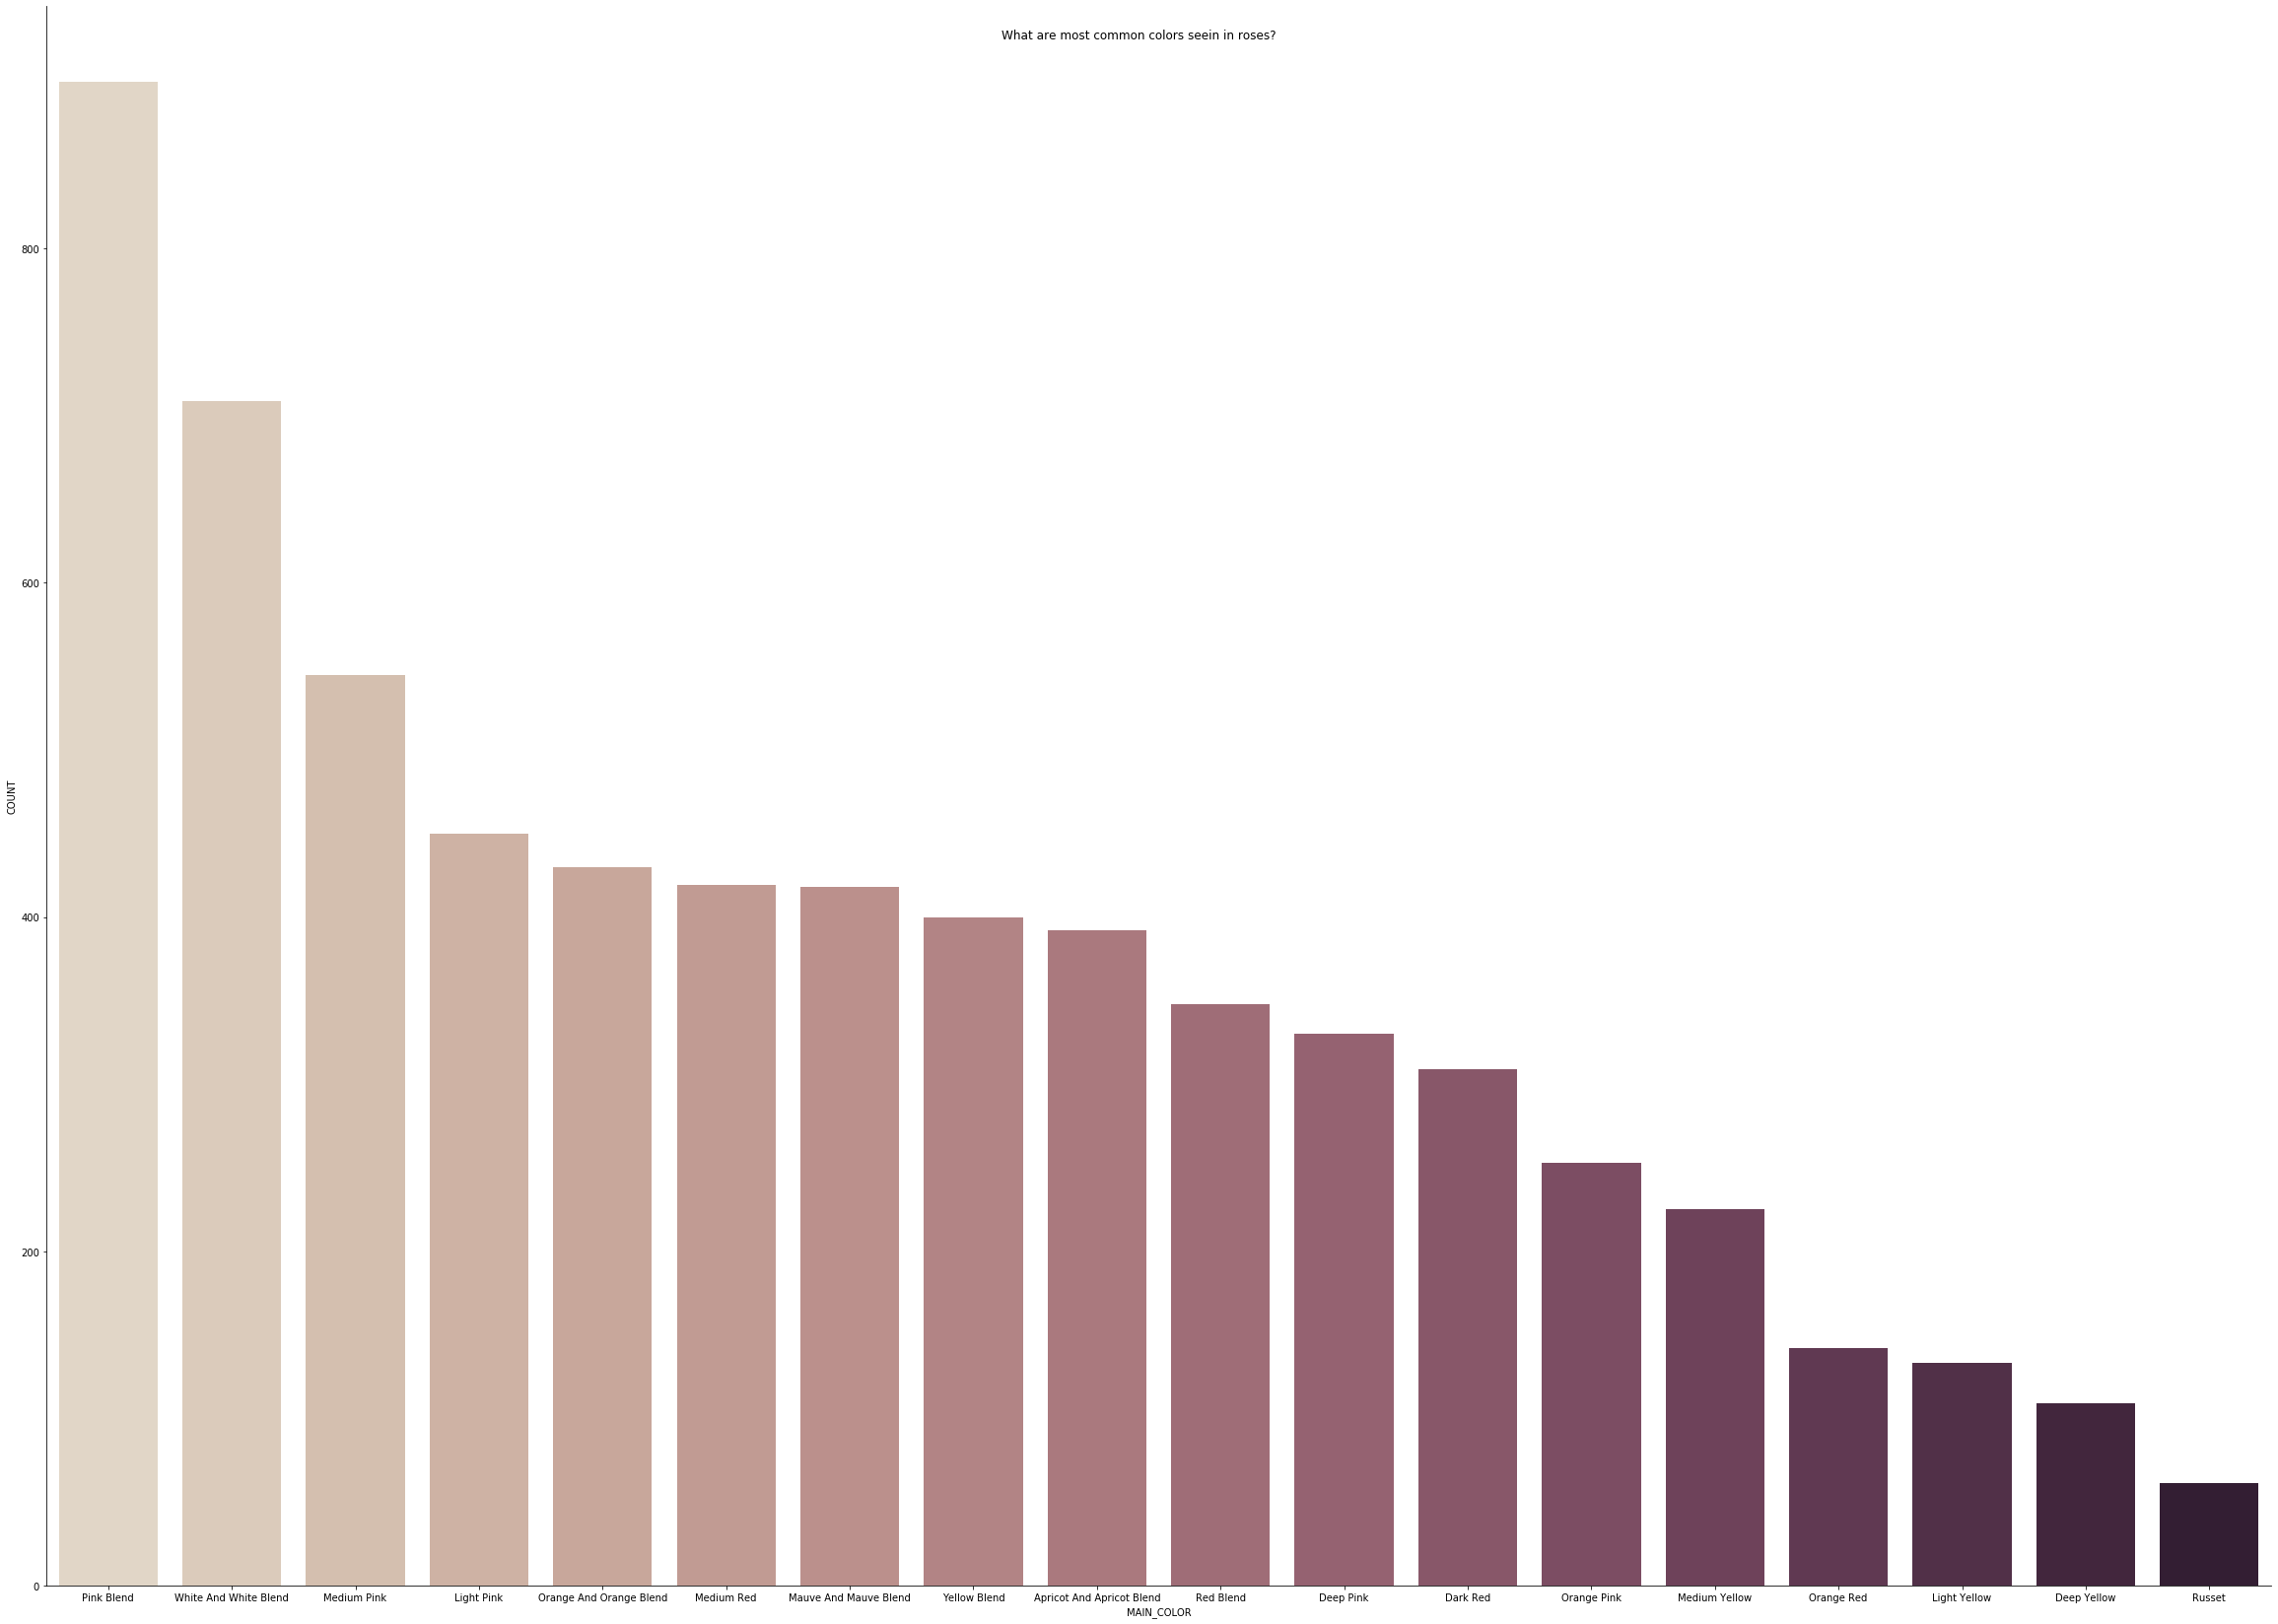

In [154]:
ax = sns.catplot(y="COUNT", x="MAIN_COLOR", kind="bar", palette="ch:.25",  data=ctn_color, height=23, aspect=1.4);

ax.fig.suptitle("What are most common colors seein in roses?")

### Who created/bread more rose varieties?

In [184]:
df['Hybridizer'].value_counts().head(100)

Ralph S. Moore                            231
Unknown                                   228
David Austin                              226
Harkness                                  218
Reimer Kordes                             190
W. Kordes & Sons                          182
Samuel Darragh McGredy IV                 149
Dr. Keith W. Zary                         130
Meilland International                    104
Alain Meilland                             99
Tom Carruth                                93
Mathias Tantau                             91
Dr. Griffith J. Buck                       86
Hans Jurgen Evers                          78
William A. Warriner                        76
Olesen                                     63
Gareth Fryer                               62
Jean-Pierre Vibert                         59
Eugene S. Gene Boerner                     58
John Clements                              56
G. Delbard                                 53
J. Benjamin Williams              

In [186]:
# creating a dataframe with counts for column 'Hybridizer'
ctn_bred_by = df['Hybridizer'].value_counts()\
                 .to_frame('COUNT').rename_axis('Hybridizer')\
                 .reset_index()

ctn_bred_by_20 = ctn_bred_by.head(20)
ctn_bred_by_10 = ctn_bred_by.head(10)

Text(0.5, 0.98, 'Who created more roses? - Top 20 results')

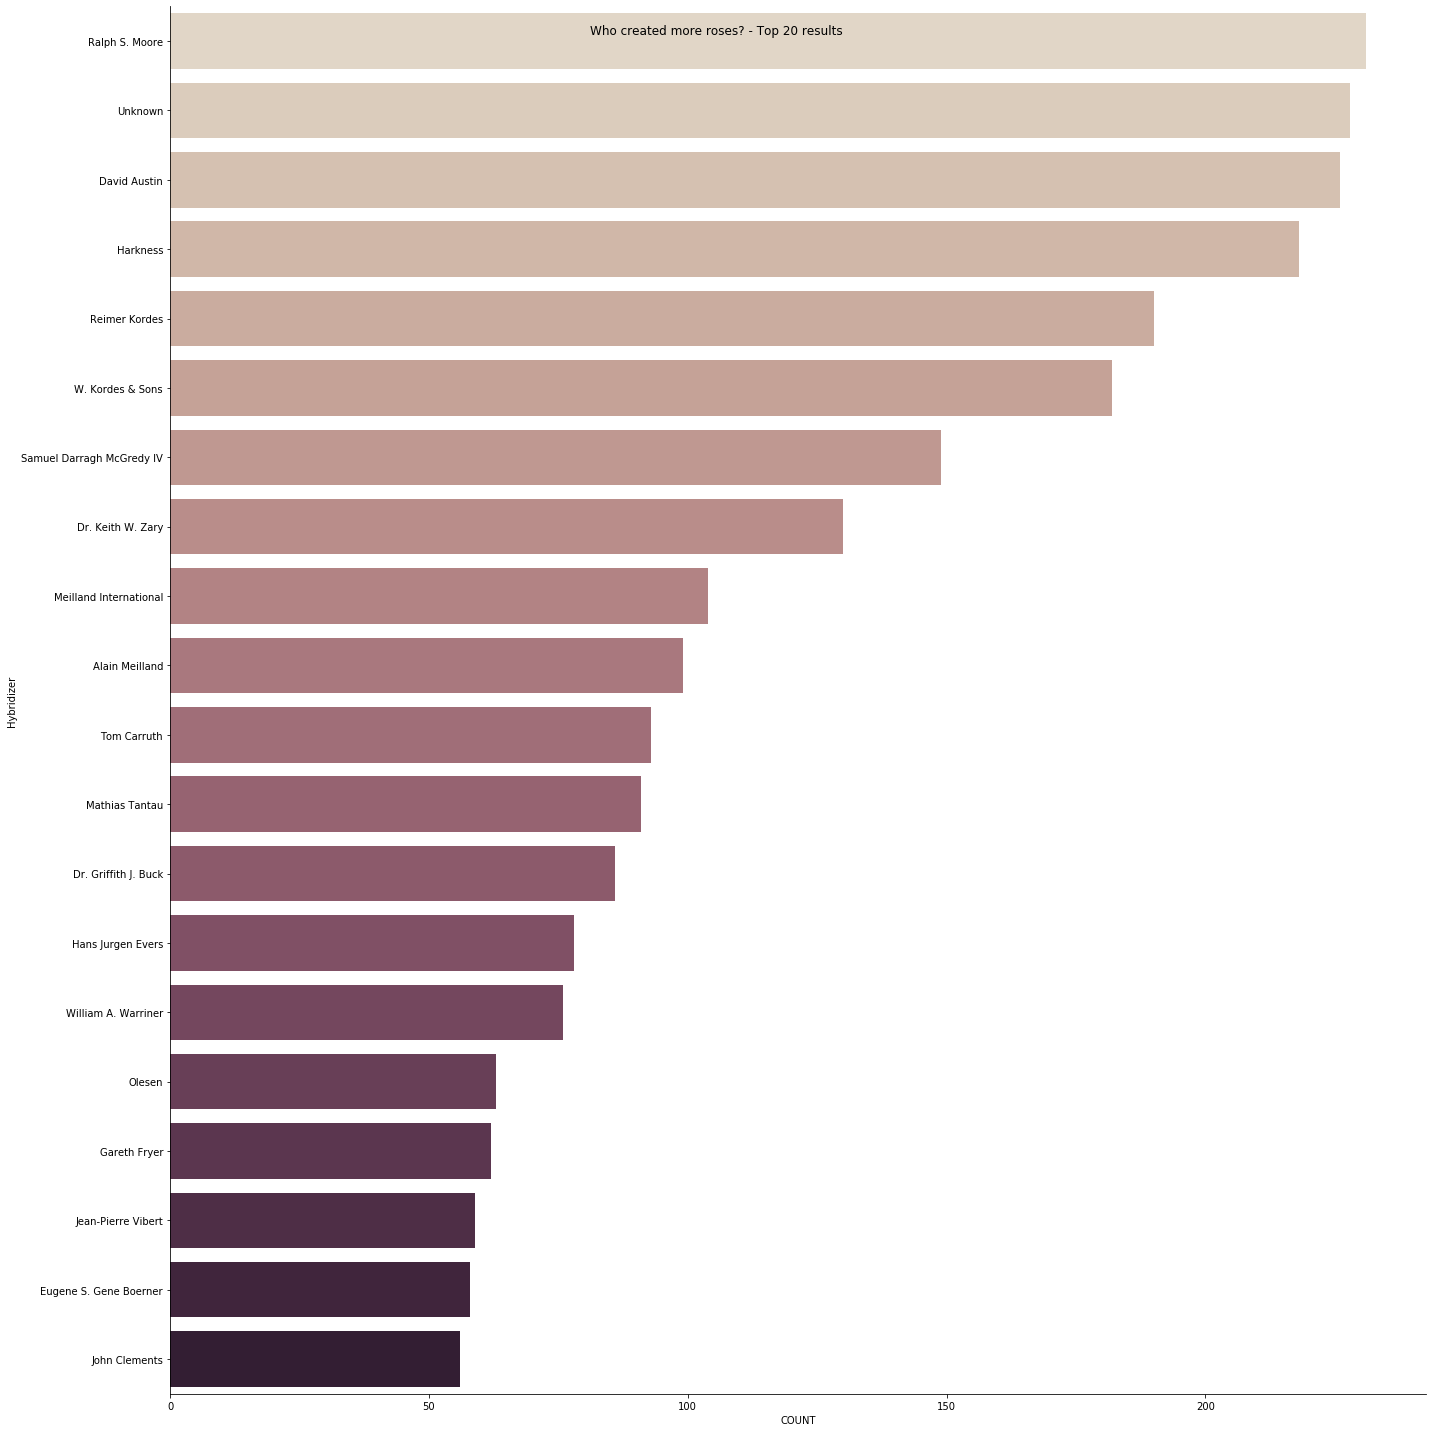

In [187]:
# plotting barchart for Hybridizer

ax = sns.catplot(y="Hybridizer", x="COUNT", kind="bar", palette="ch:.25",  data=ctn_bred_by_20, height=20, aspect=1);

ax.fig.suptitle("Who created more roses? - Top 20 results")

In [188]:
df[['Hybridizer']][(df.Hybridizer != "Unknown") & (df.Hybridizer != "Unknown  ")].value_counts().head(50)\
                                                             .to_frame('COUNT').rename_axis('Hybridizer')\
                                                             .reset_index()

Hybridizer  COUNT
0              Ralph S. Moore    231
1                David Austin    226
2                    Harkness    218
3               Reimer Kordes    190
4            W. Kordes & Sons    182
5   Samuel Darragh McGredy IV    149
6           Dr. Keith W. Zary    130
7      Meilland International    104
8              Alain Meilland     99
9                 Tom Carruth     93
10             Mathias Tantau     91
11       Dr. Griffith J. Buck     86
12          Hans Jurgen Evers     78
13        William A. Warriner     76
14                     Olesen     63
15               Gareth Fryer     62
16         Jean-Pierre Vibert     59
17     Eugene S. Gene Boerner     58
18              John Clements     56
19                 G. Delbard     53
20       J. Benjamin Williams     52
21                 Louis Lens     51
22     Wilhelm J.H. Kordes II     49
23   Marie-Louise () Meilland     47
24            Patrick Dickson     47
25        Jack E. Christensen     42
26           Francis Meilland     37
27           Christian Bedard     36
28   De Ruiter Innovations BV     35
29                Jean Laffay     34
30      Christopher H. Warner     33
31       Joseph Pernet-Ducher     33
32               Brad Jalbert     32
33            Herbert C. Swim     31
34            Robert & Moreau     30
35              Amanda Beales     30
36                    Saville     30
37         Tim Hermann Kordes     30
38                   Ping Lim     30
39                Dee Bennett     28
40          William J. Radler     27
41                Paul Barden     27
42             Anne G. Cocker     26
43        Frank A. Benardella     25
44       George Michael Shoup     25
45              Alister Clark     24
46     Dr. Walter E. Lammerts     24
47           Rudolf Geschwind     24
48              Peter Lambert     23
49            Brownell Family     23

In [189]:
# counts without Unknown 
df[['Hybridizer']][(df.Hybridizer != "Unknown") & (df.Hybridizer != "Unknown  ")].value_counts().head(20)

Hybridizer               
Ralph S. Moore               231
David Austin                 226
Harkness                     218
Reimer Kordes                190
W. Kordes & Sons             182
Samuel Darragh McGredy IV    149
Dr. Keith W. Zary            130
Meilland International       104
Alain Meilland                99
Tom Carruth                   93
Mathias Tantau                91
Dr. Griffith J. Buck          86
Hans Jurgen Evers             78
William A. Warriner           76
Olesen                        63
Gareth Fryer                  62
Jean-Pierre Vibert            59
Eugene S. Gene Boerner        58
John Clements                 56
G. Delbard                    53
dtype: int64

In [190]:
# creating a dataframe with counts for column 'Hybridizer' without Unknown 
df_hyb = df[['Hybridizer']][(df.Hybridizer != "Unknown") & (df.Hybridizer != "Unknown  ")].value_counts().head(20)\
                                                                      .to_frame('COUNT').rename_axis('Hybridizer')\
                                                                      .reset_index()

In [191]:
# plotting barchart for Hybridizer

ax = sns.catplot(y="Hybridizer", x="COUNT", kind="bar", palette="ch:.25",  data=df_hyb, height=20, aspect=1, margin_titles=True);

# ax.fig.suptitle("Who created more roses? - Top 20 results")


### Counts by Breader and Year.

In [192]:
df['Year'] = pd.to_numeric(df['YEAR'])

In [193]:
df[['YEAR', 'Hybridizer']][(df['Year'] > 1999) & (df['Year'] < 2010)].value_counts()

YEAR  Hybridizer                                 
2007  Dr. Keith W. Zary                              17
2006  George Michael Shoup                           16
      Tom Carruth                                    12
2002  W. Kordes & Sons                               12
2006  Alain Meilland                                 12
2007  W. Kordes & Sons                               12
2006  Ralph S. Moore                                 12
2000  Dr. Keith W. Zary                              11
2005  David Austin                                   10
      Dr. Keith W. Zary                              10
2001  Ralph S. Moore                                 10
2003  Ralph S. Moore                                 10
2001  W. Kordes & Sons                               10
2006  Amanda Beales                                  10
2004  Tom Carruth                                     9
2007  David Austin                                    9
2000  W. Kordes & Sons                                

In [194]:
df[['YEAR']].value_counts(sort=False)

YEAR
1240      1
1400      1
1450      1
1551      1
1557      1
1560      1
1581      1
1589      1
1597      2
1612      1
1629      1
1633      1
1659      1
1664      1
1696      1
1700      1
1730      1
1732      1
1739      1
1750      1
1752      1
1759      2
1765      1
1773      2
1775      2
1788      1
1789      4
1790      3
1791      1
1792      1
1793      1
1795      1
1798      1
1799      2
1800      5
1801      1
1804      2
1806      2
1807      1
1808      3
1810      7
1811      5
1812      1
1813      3
1814      3
1815      5
1816      1
1817      9
1818      4
1819      5
1820      2
1821      3
1822      2
1823      3
1824      7
1825      6
1826      5
1827      6
1828      9
1829      9
1830     10
1831      3
1832      6
1833      2
1834     12
1835     11
1836      5
1837     14
1838      7
1839      5
1840      5
1841      6
1842      8
1843     13
1844      2
1845     24
1846     15
1847      7
1848      6
1849      3
1850      5
1851      7
1852      7

In [197]:
# creating a dataframe with counts for column 'Hybridizer' without Unknown 
df_year = df[['Year']].value_counts().to_frame('COUNT').rename_axis('Year')\
                                                                    .reset_index()

In [200]:
df_year['Year'] = pd.to_numeric(df_year['Year'])

In [201]:
df_year

Year  COUNT
0    2006.0    169
1    1998.0    169
2    2000.0    138
3    1999.0    135
4    1991.0    133
5    1997.0    123
6    2007.0    119
7    1995.0    116
8    2005.0    116
9    1984.0    115
10   2003.0    112
11   1996.0    110
12   2001.0    110
13   1994.0    108
14   2004.0    107
15   1988.0    106
16   1989.0    106
17   1992.0    103
18   2002.0    100
19   1993.0     98
20   1986.0     97
21   1985.0     94
22   1983.0     86
23   1990.0     85
24   1980.0     70
25   1982.0     70
26   2008.0     69
27   1976.0     69
28   1981.0     67
29   1987.0     67
30   1970.0     62
31   1964.0     61
32   2009.0     61
33   1978.0     58
34   2013.0     57
35   1962.0     57
36   1977.0     55
37   1961.0     55
38   2010.0     53
39   1968.0     52
40   1956.0     51
41   2011.0     51
42   1965.0     49
43   1966.0     48
44   1971.0     47
45   1969.0     46
46   1975.0     45
47   1972.0     44
48   2012.0     43
49   1973.0     43
50   1963.0     41
51   1960.0     41
52   1979.0     41
53   1957.0     41
54   1958.0     40
55   1974.0     39
56   1959.0     37
57   1967.0     34
58   1955.0     33
59   1954.0     31
60   1937.0     30
61   2015.0     28
62   2014.0     26
63   1949.0     25
64   1845.0     24
65   2016.0     24
66   1951.0     23
67   1950.0     23
68   1952.0     22
69   1938.0     21
70   1953.0     21
71   1936.0     21
72   1931.0     20
73   1909.0     20
74   1930.0     20
75   1929.0     19
76   1901.0     19
77   1900.0     19
78   1940.0     19
79   1926.0     19
80   1927.0     19
81   2017.0     19
82   1948.0     18
83   1932.0     18
84   1858.0     17
85   1939.0     17
86   1947.0     17
87   1935.0     17
88   1898.0     16
89   1920.0     16
90   1894.0     16
91   1933.0     16
92   1887.0     16
93   1942.0     15
94   1922.0     15
95   1846.0     15
96   1910.0     15
97   1912.0     15
98   1893.0     14
99   1890.0     14
100  1837.0     14
101  1902.0     14
102  1904.0     14
103  1906.0     14
104  1913.0     14
105  1934.0     14
106  1946.0     14
107  1924.0     14
108  1918.0     14
109  1921.0     14
110  1928.0     13
111  1903.0     13
112  1843.0     13
113  1943.0     13
114  1925.0     12
115  1923.0     12
116  1834.0     12
117  1919.0     12
118  1835.0     11
119  1905.0     11
120  1892.0     11
121  1945.0     11
122  1908.0     11
123  1907.0     11
124  1830.0     10
125  2018.0     10
126  1899.0     10
127  1860.0     10
128  1941.0     10
129  1916.0     10
130  1878.0      9
131  1829.0      9
132  1880.0      9
133  1817.0      9
134  1879.0      9
135  1862.0      9
136  1828.0      9
137  1889.0      9
138  1854.0      9
139  1872.0      9
140  1895.0      9
141  1853.0      9
142  1863.0      9
143  1864.0      8
144  1869.0      8
145  1865.0      8
146  1914.0      8
147  1842.0      8
148  1875.0      8
149  1877.0      8
150  1885.0      8
151  1855.0      8
152  1888.0      8
153  1810.0      7
154  1861.0      7
155  1852.0      7
156  1851.0      7
157  1881.0      7
158  1838.0      7
159  1874.0      7
160  1882.0      7
161  1883.0      7
162  1891.0      7
163  1917.0      7
164  1824.0      7
165  1847.0      7
166  1841.0      6
167  1832.0      6
168  1848.0      6
169  1827.0      6
170  1825.0      6
171  2019.0      6
172  1896.0      6
173  1911.0      6
174  1884.0      6
175  1859.0      6
176  1876.0      6
177  1868.0      6
178  1897.0      6
179  1915.0      5
180  1944.0      5
181  1850.0      5
182  1815.0      5
183  1800.0      5
184  1836.0      5
185  1811.0      5
186  1867.0      5
187  1839.0      5
188  1840.0      5
189  1819.0      5
190  1857.0      5
191  1856.0      5
192  1826.0      5
193  1818.0      4
194  1873.0      4
195  1886.0      4
196  1871.0      4
197  1866.0      4
198  1789.0      4
199  1808.0      3
200  1790.0      3
201  1813.0      3
202  1814.0      3
203  1849.0      3
204  1870.0      3
205  1821.0      3
206  1823.0      3
207  1831.0      3
208  1844.0      2
209  1773.0      

In [215]:
plt.figure(figsize=(55,25))
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.rc('axes', labelsize=25) 
plt.rc('axes', labelsize=25) 
sns.lineplot(data=df_year, x="Year", y="COUNT")

In [334]:
df['Year'].value_counts(bins=3)

(1759.333, 2019.0]      6233
(1499.667, 1759.333]      21
(1239.22, 1499.667]        3
Name: Year, dtype: int64

In [335]:
df['Year'].value_counts(bins=5)

(1863.2, 2019.0]     5827
(1707.4, 1863.2]      413
(1551.6, 1707.4]       13
(1395.8, 1551.6]        3
(1239.22, 1395.8]       1
Name: Year, dtype: int64

In [336]:
df['Year'].value_counts(bins=10)

(1941.1, 2019.0]     4903
(1863.2, 1941.1]      924
(1785.3, 1863.2]      401
(1707.4, 1785.3]       12
(1551.6, 1629.5]        8
(1629.5, 1707.4]        5
(1395.8, 1473.7]        2
(1473.7, 1551.6]        1
(1239.22, 1317.9]       1
(1317.9, 1395.8]        0
Name: Year, dtype: int64

In [337]:
df['Year'].value_counts(bins=30)

(1993.033, 2019.0]      2179
(1967.067, 1993.033]    1898
(1941.1, 1967.067]       826
(1915.133, 1941.1]       419
(1889.167, 1915.133]     318
(1837.233, 1863.2]       214
(1863.2, 1889.167]       187
(1811.267, 1837.233]     146
(1785.3, 1811.267]        41
(1759.333, 1785.3]         5
(1733.367, 1759.333]       5
(1577.567, 1603.533]       4
(1551.6, 1577.567]         2
(1603.533, 1629.5]         2
(1655.467, 1681.433]       2
(1681.433, 1707.4]         2
(1707.4, 1733.367]         2
(1629.5, 1655.467]         1
(1525.633, 1551.6]         1
(1447.733, 1473.7]         1
(1395.8, 1421.767]         1
(1239.22, 1265.967]        1
(1499.667, 1525.633]       0
(1473.7, 1499.667]         0
(1421.767, 1447.733]       0
(1369.833, 1395.8]         0
(1343.867, 1369.833]       0
(1317.9, 1343.867]         0
(1291.933, 1317.9]         0
(1265.967, 1291.933]       0
Name: Year, dtype: int64

### What are the most popular rose classes? 

In [338]:
# creating a dataframe with counts for column class
ctn_class = df['Class'].value_counts()\
                 .to_frame('COUNT').rename_axis('Class')\
                 .reset_index()

ctn_class_15 = ctn_class.head(15)
ctn_class_25 = ctn_class.head(25)
ctn_class_35 = ctn_class.head(35)

In [339]:
ax = sns.catplot(y="Class", 
                 x="COUNT", 
                 kind="bar", 
                 palette="ch:.25",  
                 data=ctn_class_15, 
                 height=40, 
                 aspect=1.5);

In [340]:
ax = sns.catplot(y="Class", x="COUNT", kind="bar", palette="ch:.25",  data=ctn_class_35, height=40, aspect=1);



### What Class can tell us about Rebloom?

In [242]:
df[['Rebloom']].value_counts()

Rebloom  
Good         5291
Some          562
None          529
Excellent     135
dtype: int64

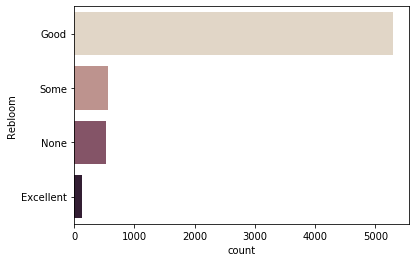

In [243]:
lorder = ['Good', 'Some', 'None', 'Excellent']

p = sns.countplot(data=df,
                  y = 'Rebloom',
                  palette="ch:.25", 
                  order = lorder)

In [244]:
df[['Class', 'Rebloom']].value_counts().head(50)

Class                          Rebloom  
Hybrid tea                     Good         1419
Floribunda                     Good         1192
Shrub                          Good          655
Miniature                      Good          494
Shrub                          Some          206
Large-flowered climber         Good          159
Grandiflora                    Good          149
Gallica                        None          117
Hybrid perpetual               Good           87
Tea                            Good           84
Polyantha                      Good           82
Bourbon                        Good           77
Hybrid tea, Florists rose      Good           74
Shrub                          Excellent      70
Hybrid musk                    Good           66
Noisette                       Good           66
Hybrid tea, Pernetiana         Good           61
Climbing hybrid tea            Good           57
Miniature, Mini-Flora          Good           54
China                       

In [245]:
df[['Class', 'Rebloom']][(df['Rebloom']  == 'None')].value_counts().head(10)

Class                Rebloom
Gallica              None       117
Moss                 None        43
Species, wild        None        38
Centifolia           None        37
Hybrid multiflora    None        34
Hybrid wichurana     None        30
Alba                 None        29
Shrub                None        17
Hybrid spinosissima  None        15
Damask               None        14
dtype: int64

In [246]:
df[['Class', 'Rebloom']][(df['Class']  == 'Gallica')].value_counts()

Class    Rebloom
Gallica  None       117
         Some         2
dtype: int64

In [247]:
df[['Class', 'Rebloom']][(df['Class']  == 'Moss')].value_counts()

Class  Rebloom
Moss   None       43
       Some       36
       Good       13
dtype: int64

In [248]:
df[['Class', 'Rebloom']][(df['Class']  == 'Species, wild')].value_counts()

Class          Rebloom
Species, wild  None       38
               Some        2
dtype: int64

In [249]:
df[['Class', 'Rebloom']][(df['Class']  == 'Centifolia')].value_counts()

Class       Rebloom
Centifolia  None       37
dtype: int64

In [250]:
df[['Class', 'Rebloom']][(df['Class']  == 'Hybrid multiflora')].value_counts()

Class              Rebloom
Hybrid multiflora  None       34
                   Some       10
                   Good        4
dtype: int64

In [251]:
df[['Class', 'Rebloom']][(df['Class']  == 'Hybrid wichurana')].value_counts()

Class             Rebloom  
Hybrid wichurana  None         30
                  Some         28
                  Good          6
                  Excellent     1
dtype: int64

In [252]:
df[['Class', 'Rebloom']][(df['Class']  == 'Alba')].value_counts()

Class  Rebloom
Alba   None       29
dtype: int64

In [253]:
df[['Class', 'Rebloom']][(df['Class']  == 'Shrub')].value_counts()

Class  Rebloom  
Shrub  Good         655
       Some         206
       Excellent     70
       None          17
dtype: int64

In [254]:
df[['Class', 'Rebloom']][(df['Class']  == 'Hybrid spinosissima')].value_counts()

Class                Rebloom
Hybrid spinosissima  None       15
                     Some        7
dtype: int64

In [255]:
df[['Class', 'Rebloom']][(df['Class']  == 'Damask')].value_counts()

Class   Rebloom
Damask  None       14
        Some        7
dtype: int64

In [256]:
df[['Class', 'Rebloom']][(df['Rebloom']  == 'Some')].value_counts().head(10)

Class                   Rebloom
Shrub                   Some       206
Large-flowered climber  Some        42
Hybrid rugosa           Some        41
Moss                    Some        36
Hybrid wichurana        Some        28
Hybrid perpetual        Some        20
Climbing hybrid tea     Some        15
Hybrid Kordesii         Some        10
Hybrid multiflora       Some        10
Hybrid kordesii         Some         8
dtype: int64

In [257]:
df[['Class', 'Rebloom']][(df['Rebloom']  == 'Good')].value_counts().head(10)

Class                   Rebloom
Hybrid tea              Good       1419
Floribunda              Good       1192
Shrub                   Good        655
Miniature               Good        494
Large-flowered climber  Good        159
Grandiflora             Good        149
Hybrid perpetual        Good         87
Tea                     Good         84
Polyantha               Good         82
Bourbon                 Good         77
dtype: int64

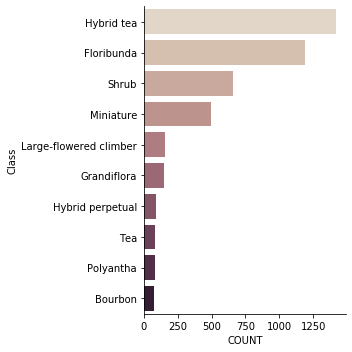

In [258]:
# creating a dataframe with counts for column class where rebloom is good
ctn_cr = df[['Class', 'Rebloom']][(df['Rebloom']  == 'Good')].value_counts()\
                 .to_frame('COUNT')\
                 .reset_index()

ctn_cr_10 = ctn_cr.head(10)

#creating bar plot

ax = sns.catplot(y="Class", 
                 x="COUNT", 
                 kind="bar", 
                 palette="ch:.25",  
                 data=ctn_cr_10);

In [259]:
df[['Class', 'Rebloom']][(df['Class']  == 'Hybrid tea')].value_counts()

Class       Rebloom  
Hybrid tea  Good         1419
            Some            5
            Excellent       1
dtype: int64

In [260]:
df[['Class', 'Rebloom']][(df['Class']  == 'Floribunda')].value_counts()

Class       Rebloom  
Floribunda  Good         1192
            Excellent      26
            Some            6
            None            1
dtype: int64

In [261]:
df[['Class', 'Rebloom']][(df['Class']  == 'Shrub')].value_counts()

Class  Rebloom  
Shrub  Good         655
       Some         206
       Excellent     70
       None          17
dtype: int64

In [262]:
df[['Class', 'Rebloom']][(df['Rebloom']  == 'Excellent')].value_counts().head(10)

Class                                Rebloom  
Shrub                                Excellent    70
Floribunda                           Excellent    26
Polyantha                            Excellent    18
Hybrid musk                          Excellent     6
Miniature                            Excellent     3
Grandiflora                          Excellent     2
China                                Excellent     2
Miniature, Hybrid hulthemia persica  Excellent     1
Large-flowered climber               Excellent     1
Hybrid wichurana                     Excellent     1
dtype: int64

In [263]:
# creating a dataframe with counts for column class where rebloom is excellent
ctn_cr = df[['Class', 'Rebloom']][(df['Rebloom']  == 'Excellent')].value_counts()\
                 .to_frame('COUNT')\
                 .reset_index()

ctn_cr_10 = ctn_cr.head(10)

#creating bar plot

ax = sns.catplot(y="Class", 
                 x="COUNT", 
                 kind="bar", 
                 palette="ch:.25",  
                 data=ctn_cr_10);

#### Summary for "What Class can tell us about Rebloom?"

Most roses have a good bloom, after all this is what breeders specificly optimised for.

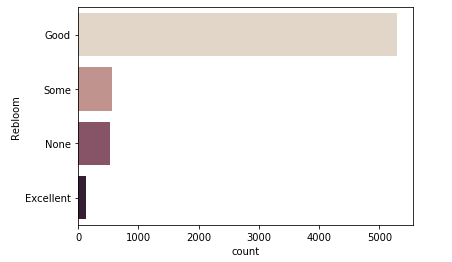

We have no rebloom or just a tiny bit of it in roses that belong to classes: 

* Alba, 
* Centifolia, 
* "Species, wild", 
* Gallica, 
* Damask, and 
* Hybrid spinosissima. 

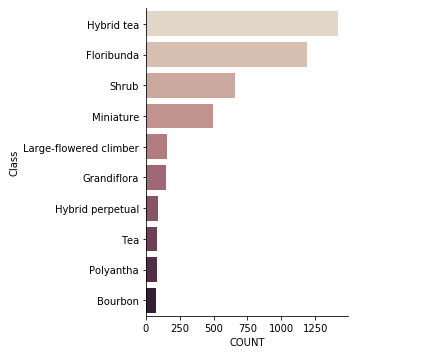

Majority of roses have good or some rebloom. 

We only have a handful of roses with excellent rebloom. They belong to the following classes:

* Shrub,  
* Floribunda,
* Polyantha, and
* Hybrid musk. 

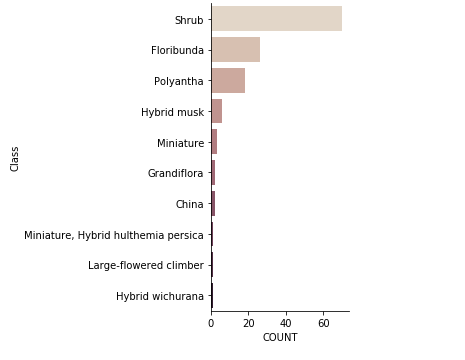

Hybrid tea and Floribunda roses have predominantly good rebloom. 


### When roses with excellent and good rebloom were invented?


In [264]:
df[['Rebloom', 'Year']][(df['Rebloom']  == 'Excellent')].value_counts().head(10)

Rebloom    Year  
Excellent  2006.0    15
           2005.0     7
           1994.0     6
           2008.0     6
           2000.0     5
           2001.0     5
           2003.0     5
           1977.0     5
           2007.0     4
           1993.0     4
dtype: int64

In [265]:
# First rose with Excellent rebloom was invented in
df[['Rebloom', 'Year']][(df['Rebloom']  == 'Excellent')].min()

Rebloom    Excellent
Year            1806
dtype: object

In [266]:
df[(df['Rebloom']  == 'Excellent') & (df['Year']  == 1806)]

Name                                                URL  \
5082  Bengale-Pompon  https://garden.org/plants/view/396/Rose-Rosa-B...   

                             Alternative_Cultivar_Names Awards  \
5082  Bengale Pompon, Bengale Nain, Bijou, Commun, P...    NaN   

     Awards_from_Data_Specific_to_Roses  Count_of_Alternative_Names  \
5082                                NaN                         6.0   

          Bloom size Bloom shape               Petal count Rose bloom color  \
5082  Small: under 2         NaN  semi-double: 8-15 petals       Light Pink   

      ...                      Miscellaneous Parentage Containers  \
5082  ...  With thorns/spines/prickles/teeth       NaN        NaN   

     Child plants  YEAR                       Hybridizer Bi-Color Multi-Color  \
5082          NaN  1806  James Colvill / Colville circa       NaN         NaN   

     Flower Color2    Year  
5082          Pink  1806.0  

[1 rows x 40 columns]

In [267]:
df[['Rebloom', 'Year']][(df['Rebloom']  == 'Good')].value_counts().head(10)

Rebloom  Year  
Good     1998.0    160
         2006.0    144
         2000.0    123
         1999.0    122
         1991.0    120
         2007.0    110
         1997.0    110
         2003.0    104
         1995.0    104
         2005.0    100
dtype: int64

In [268]:
# First rose with Good rebloom was invented in
df[['Rebloom', 'Year']][(df['Rebloom']  == 'Good')].min()

Rebloom    Good
Year       1792
dtype: object

In [269]:
df[(df['Rebloom']  == 'Good') & (df['Year']  == 1792)]

Name  \
2282  Slaters-Crimson-China   

                                                    URL  \
2282  https://garden.org/plants/view/400/Rose-Rosa-S...   

                             Alternative_Cultivar_Names Awards  \
2282  Slaters Crimson China, Rosier du Bengale, Red ...    NaN   

     Awards_from_Data_Specific_to_Roses  Count_of_Alternative_Names  \
2282                                NaN                        10.0   

       Bloom size Bloom shape               Petal count Rose bloom color  ...  \
2282  Medium: 2-3         NaN  semi-double: 8-15 petals       Medium Red  ...   

                          Miscellaneous Parentage Containers     Child plants  \
2282  With thorns/spines/prickles/teeth   Unknown        NaN  one child plant   

      YEAR                          Hybridizer Bi-Color Multi-Color  \
2282  1792  Unknown Chinese Breeder(s) before       NaN         NaN   

     Flower Color2    Year  
2282           Red  1792.0  

[1 rows x 40 columns]

Rose "Bengale Pompon" is the first rose with excellent rebloom. It was invented in 1806.

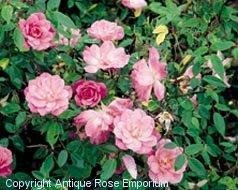


Rose "Slaters-Crimson-China" is the first rose with good rebloom. It was invented in 1792.

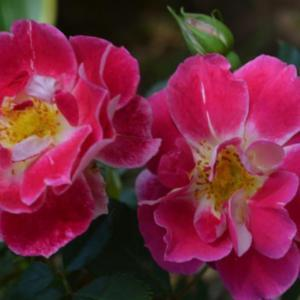

Both roses are semi-double and have 8-15 petals.


### What is happening with petal count overtime? 


In [270]:
df[['Petal count']].value_counts()

Petal count             
full: 26-40 petals          3300
double: 16-25 petals        1276
very full: 40+ petals        948
semi-double: 8-15 petals     579
Single: 1-7 petals           428
dtype: int64

In [271]:
# creating a dataframe with counts for column petal count and year
ctn_cr = df[['Petal count', 'Year']].value_counts()\
                 .to_frame('COUNT')\
                 .reset_index()

ctn_cr['Year'] = ctn_cr['Year'].astype(int)
ctn_cr['Year'] = ctn_cr['Year'].astype('string')

ctn_cr

Petal count  Year  COUNT
0          full: 26-40 petals  1998     93
1          full: 26-40 petals  2006     76
2          full: 26-40 petals  1991     68
3          full: 26-40 petals  2004     64
4          full: 26-40 petals  1994     64
5          full: 26-40 petals  2005     63
6          full: 26-40 petals  2000     63
7          full: 26-40 petals  1996     61
8          full: 26-40 petals  1995     61
9          full: 26-40 petals  1999     60
10         full: 26-40 petals  1984     59
11         full: 26-40 petals  2003     58
12         full: 26-40 petals  1986     58
13         full: 26-40 petals  2007     56
14         full: 26-40 petals  1997     56
15         full: 26-40 petals  1985     54
16         full: 26-40 petals  1992     53
17         full: 26-40 petals  1993     51
18         full: 26-40 petals  2001     50
19         full: 26-40 petals  1989     49
20         full: 26-40 petals  1988     46
21         full: 26-40 petals  1983     45
22         full: 26-40 petals  2002     45
23         full: 26-40 petals  1976     40
24         full: 26-40 petals  1977     39
25         full: 26-40 petals  1987     37
26         full: 26-40 petals  1990     37
27         full: 26-40 petals  1982     37
28         full: 26-40 petals  2008     36
29         full: 26-40 petals  1981     35
30         full: 26-40 petals  1980     35
31         full: 26-40 petals  1978     35
32       double: 16-25 petals  1984     34
33         full: 26-40 petals  1966     32
34         full: 26-40 petals  2009     32
35       double: 16-25 petals  2006     32
36         full: 26-40 petals  1964     31
37       double: 16-25 petals  1989     30
38         full: 26-40 petals  1972     30
39         full: 26-40 petals  1961     30
40       double: 16-25 petals  1999     30
41       double: 16-25 petals  1998     30
42      very full: 40+ petals  2000     30
43       double: 16-25 petals  1988     29
44         full: 26-40 petals  2013     29
45         full: 26-40 petals  1970     29
46         full: 26-40 petals  1969     29
47         full: 26-40 petals  1968     29
48         full: 26-40 petals  2011     29
49         full: 26-40 petals  2010     28
50       double: 16-25 petals  1991     28
51         full: 26-40 petals  1962     28
52       double: 16-25 petals  2000     27
53         full: 26-40 petals  1974     26
54         full: 26-40 petals  1971     26
55      very full: 40+ petals  2006     26
56      very full: 40+ petals  1999     25
57      very full: 40+ petals  1997     25
58      very full: 40+ petals  2007     25
59      very full: 40+ petals  1998     24
60       double: 16-25 petals  2007     23
61         full: 26-40 petals  1963     23
62       double: 16-25 petals  2001     23
63       double: 16-25 petals  1997     22
64       double: 16-25 petals  2003     22
65         full: 26-40 petals  1965     22
66         full: 26-40 petals  2012     22
67       double: 16-25 petals  1992     22
68       double: 16-25 petals  1983     21
69         full: 26-40 petals  1967     21
70      very full: 40+ petals  2002     21
71         full: 26-40 petals  1979     20
72       double: 16-25 petals  1964     20
73      very full: 40+ petals  2004     20
74      very full: 40+ petals  2005     20
75         Single: 1-7 petals  2006     20
76      very full: 40+ petals  1991     20
77         full: 26-40 petals  1973     20
78         full: 26-40 petals  1975     20
79       double: 16-25 petals  1986     19
80       double: 16-25 petals  1985     19
81      very full: 40+ petals  2003     19
82      very full: 40+ petals  2001     19
83         full: 26-40 petals  1949     18
84         full: 26-40 petals  1957     18
85         full: 26-40 petals  1955     18
86         full: 26-40 petals  1954     18
87         full: 26-40 petals  1958     18
88       double: 16-25 petals  2002     18
89       double: 16-25 petals  1996     18
90       double: 16-25 petals  1993     18
91         full: 26-40 petals  2015     17
92       double: 16

In [272]:
petal_ctn = ctn_cr.pivot("Year", "Petal count", "COUNT")
petal_ctn

Petal count  Single: 1-7 petals  double: 16-25 petals  full: 26-40 petals  \
Year                                                                        
1240                        NaN                   NaN                 NaN   
1400                        NaN                   NaN                 NaN   
1450                        NaN                   NaN                 NaN   
1551                        NaN                   NaN                 NaN   
1557                        1.0                   NaN                 NaN   
1560                        NaN                   1.0                 NaN   
1581                        NaN                   NaN                 NaN   
1589                        NaN                   NaN                 NaN   
1597                        NaN                   NaN                 NaN   
1612                        NaN                   1.0                 NaN   
1629                        NaN                   NaN                 NaN   
1633                        NaN                   NaN                 1.0   
1659                        NaN                   NaN                 NaN   
1664                        NaN                   NaN                 NaN   
1696                        NaN                   NaN                 NaN   
1700                        NaN                   NaN                 1.0   
1730                        NaN                   NaN                 NaN   
1732                        NaN                   NaN                 NaN   
1739                        NaN                   1.0                 NaN   
1750                        NaN                   NaN                 1.0   
1752                        NaN                   NaN                 1.0   
1759                        NaN                   NaN                 1.0   
1765                        1.0                   NaN                 NaN   
1773                        NaN                   NaN                 2.0   
1775                        NaN                   1.0                 NaN   
1788                        NaN                   NaN                 1.0   
1789                        1.0                   NaN                 2.0   
1790                        NaN                   NaN                 NaN   
1791                        NaN                   NaN                 NaN   
1792                        NaN                   NaN                 NaN   
1793                        NaN                   1.0                 NaN   
1795                        NaN                   NaN                 NaN   
1798                        1.0                   NaN                 NaN   
1799                        NaN                   NaN                 1.0   
1800                        1.0                   2.0                 1.0   
1801                        NaN                   NaN                 NaN   
1804                        NaN                   1.0                 NaN   
1806                        NaN                   NaN                 1.0   
1807                        1.0                   NaN                 NaN   
1808                        NaN                   1.0                 1.0   
1810                        NaN                   NaN                 2.0   
1811                        NaN                   1.0                 2.0   
1812                        NaN                   NaN                 1.0   
1813                        NaN                   NaN                 2.0   
1814                        NaN                   NaN                 2.0   
1815                        NaN                   NaN                 2.0   
1816                        NaN                   NaN                 NaN   
1817                        1.0                   NaN                 7.0   
1818                        NaN                   NaN                 2.0   
1819                        NaN                   NaN                 4.0

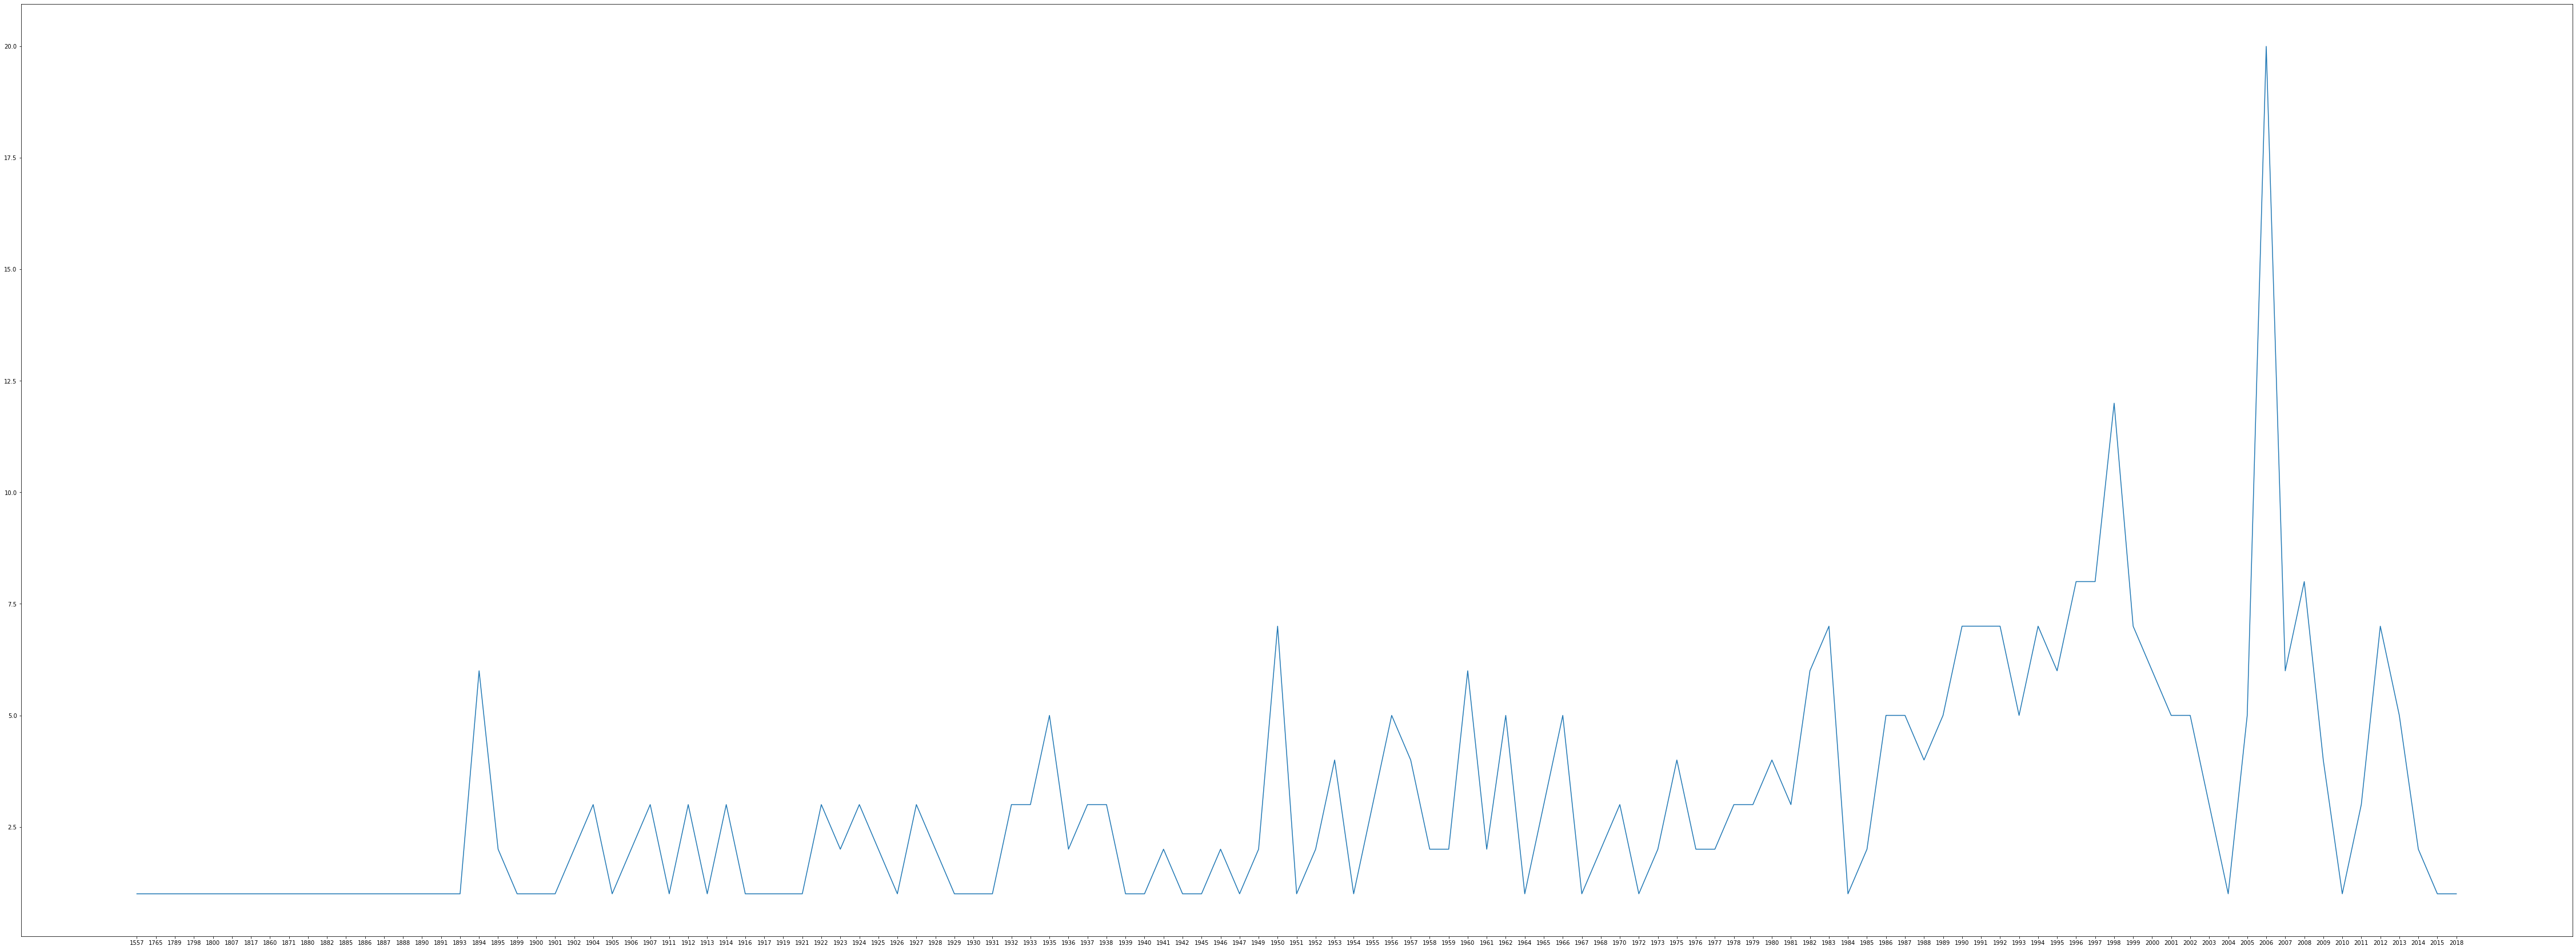

In [273]:
#creating line plot for petal count - "Single: 1-7 petals"

a4_dims = (80, 30)
fig, ax = plt.subplots(figsize=a4_dims)

p= sns.lineplot(ax=ax, data=petal_ctn["Single: 1-7 petals"],  dashes = False)

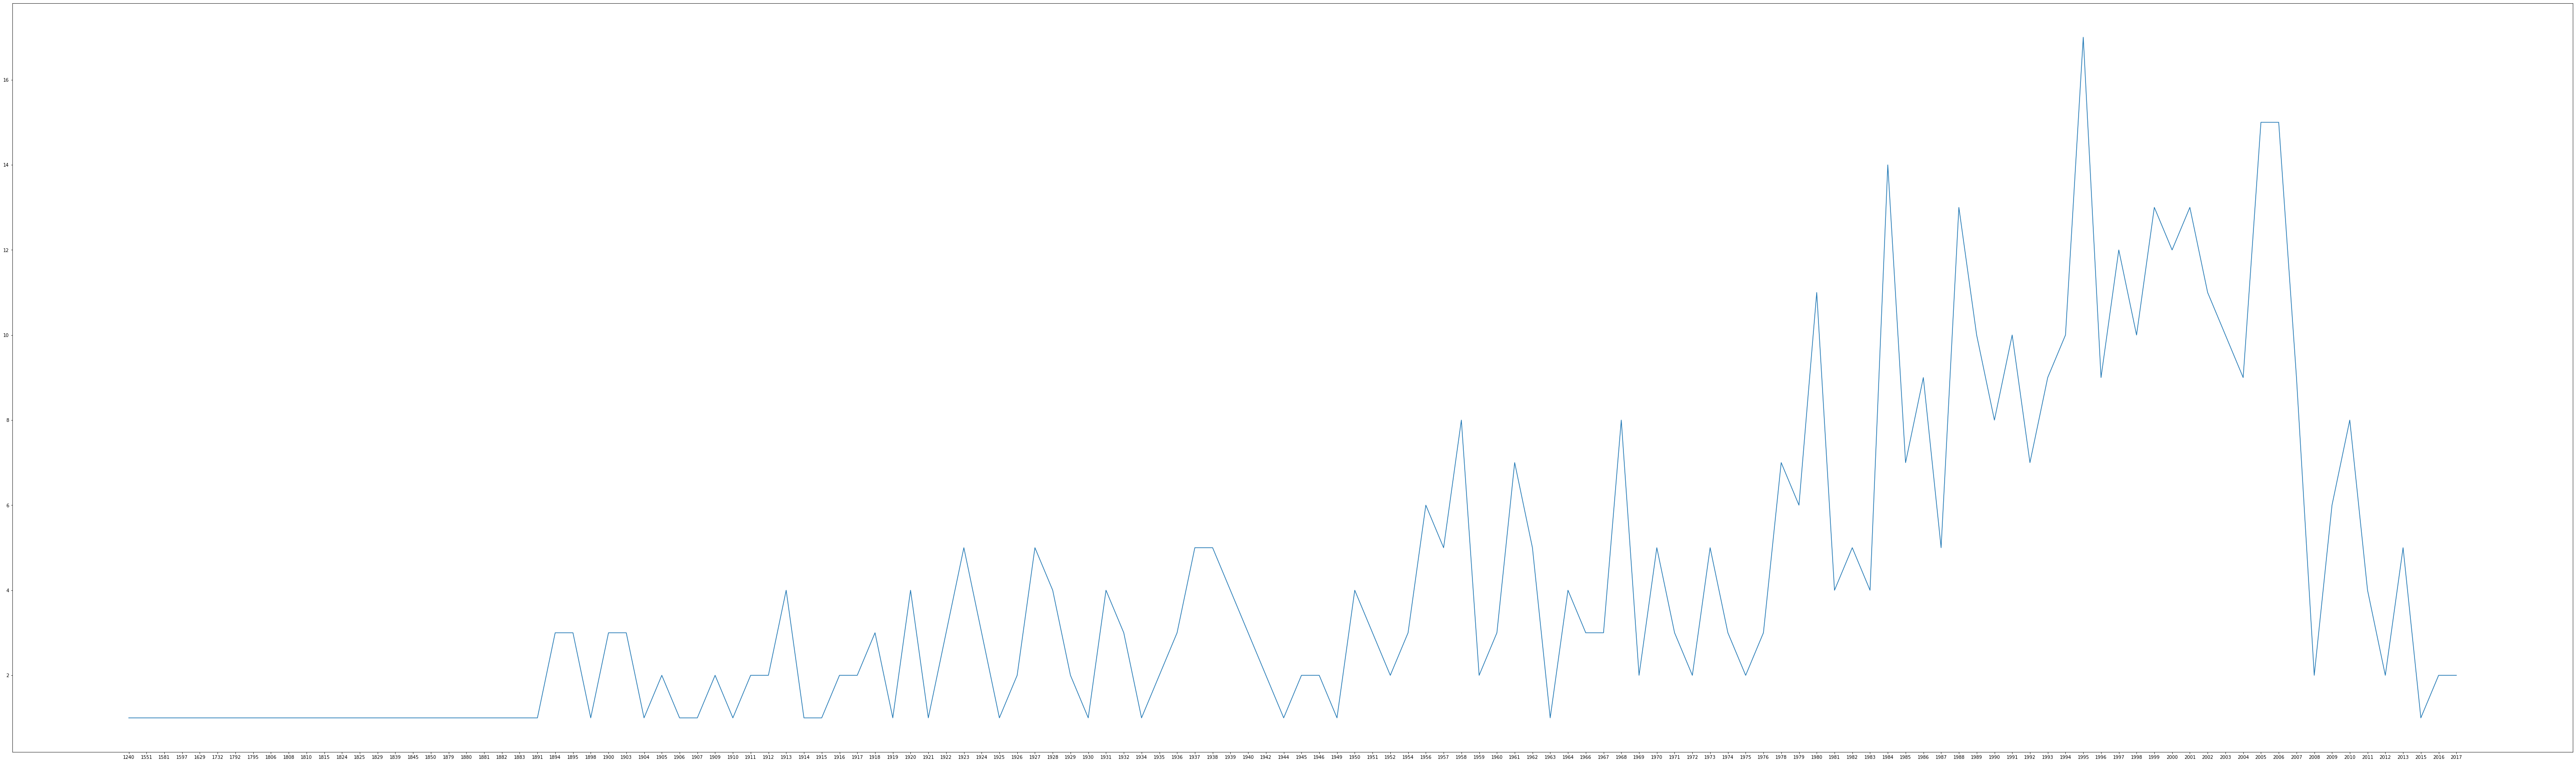

In [274]:
#creating line plot for petal count - "semi-double: 8-15 petals"

a4_dims = (100, 30)
fig, ax = plt.subplots(figsize=a4_dims)

p= sns.lineplot(ax=ax, data=petal_ctn["semi-double: 8-15 petals"],  dashes = False)

In [275]:
#creating line plot for petal count - "double: 16-25 petals"

a4_dims = (100, 30)
fig, ax = plt.subplots(figsize=a4_dims)

p= sns.lineplot(ax=ax, data=petal_ctn["double: 16-25 petals"],  dashes = False)

In [276]:
#creating line plot for petal count - "full: 26-40 petals"

a4_dims = (120, 30)
fig, ax = plt.subplots(figsize=a4_dims)

p= sns.lineplot(ax=ax, data=petal_ctn["full: 26-40 petals"],  dashes = False)

In [277]:
#creating line plot for petal count - "very full: 40+ petals"

a4_dims = (120, 30)
fig, ax = plt.subplots(figsize=a4_dims)

p= sns.lineplot(ax=ax, data=petal_ctn["very full: 40+ petals"],  dashes = False)

In [280]:
ctn_cr_1900 = ctn_cr[(ctn_cr['Year']  > '1900')]
petal_ctn_1900 = ctn_cr_1900.pivot("Year", "Petal count", "COUNT")
petal_ctn_1900

Petal count  Single: 1-7 petals  double: 16-25 petals  full: 26-40 petals  \
Year                                                                        
1901                        1.0                   2.0                15.0   
1902                        2.0                   5.0                 5.0   
1903                        NaN                   4.0                 5.0   
1904                        3.0                   1.0                 9.0   
1905                        1.0                   1.0                 5.0   
1906                        2.0                   1.0                 8.0   
1907                        3.0                   NaN                 5.0   
1908                        NaN                   4.0                 6.0   
1909                        NaN                   3.0                10.0   
1910                        NaN                   3.0                10.0   
1911                        1.0                   1.0                 2.0   
1912                        3.0                   1.0                 9.0   
1913                        1.0                   2.0                 5.0   
1914                        3.0                   1.0                 3.0   
1915                        NaN                   3.0                 1.0   
1916                        1.0                   2.0                 5.0   
1917                        1.0                   NaN                 3.0   
1918                        NaN                   3.0                 5.0   
1919                        1.0                   4.0                 6.0   
1920                        NaN                   6.0                 5.0   
1921                        1.0                   2.0                 8.0   
1922                        3.0                   2.0                 6.0   
1923                        2.0                   1.0                 4.0   
1924                        3.0                   4.0                 4.0   
1925                        2.0                   4.0                 4.0   
1926                        1.0                   9.0                 7.0   
1927                        3.0                   4.0                 5.0   
1928                        2.0                   NaN                 6.0   
1929                        1.0                   3.0                 9.0   
1930                        1.0                   7.0                 8.0   
1931                        1.0                   7.0                 8.0   
1932                        3.0                   4.0                 7.0   
1933                        3.0                   3.0                10.0   
1934                        NaN                   4.0                 7.0   
1935                        5.0                   4.0                 6.0   
1936                        2.0                   5.0                10.0   
1937                        3.0                   7.0                13.0   
1938                        3.0                   7.0                 6.0   
1939                        1.0                   1.0                 8.0   
1940                        1.0                   2.0                10.0   
1941                        2.0                   2.0                 5.0   
1942                        1.0                   1.0                11.0   
1943                        NaN                   3.0                10.0   
1944                        NaN                   3.0                 1.0   
1945                        1.0                   4.0                 3.0   
1946                        2.0                   4.0                 5.0   
1947                        1.0                   3.0                11.0   
1948                        NaN                   5.0                12.0   
1949                        2.0                   2.0                18.0   
1950                        7.0                   4.0                 6.0

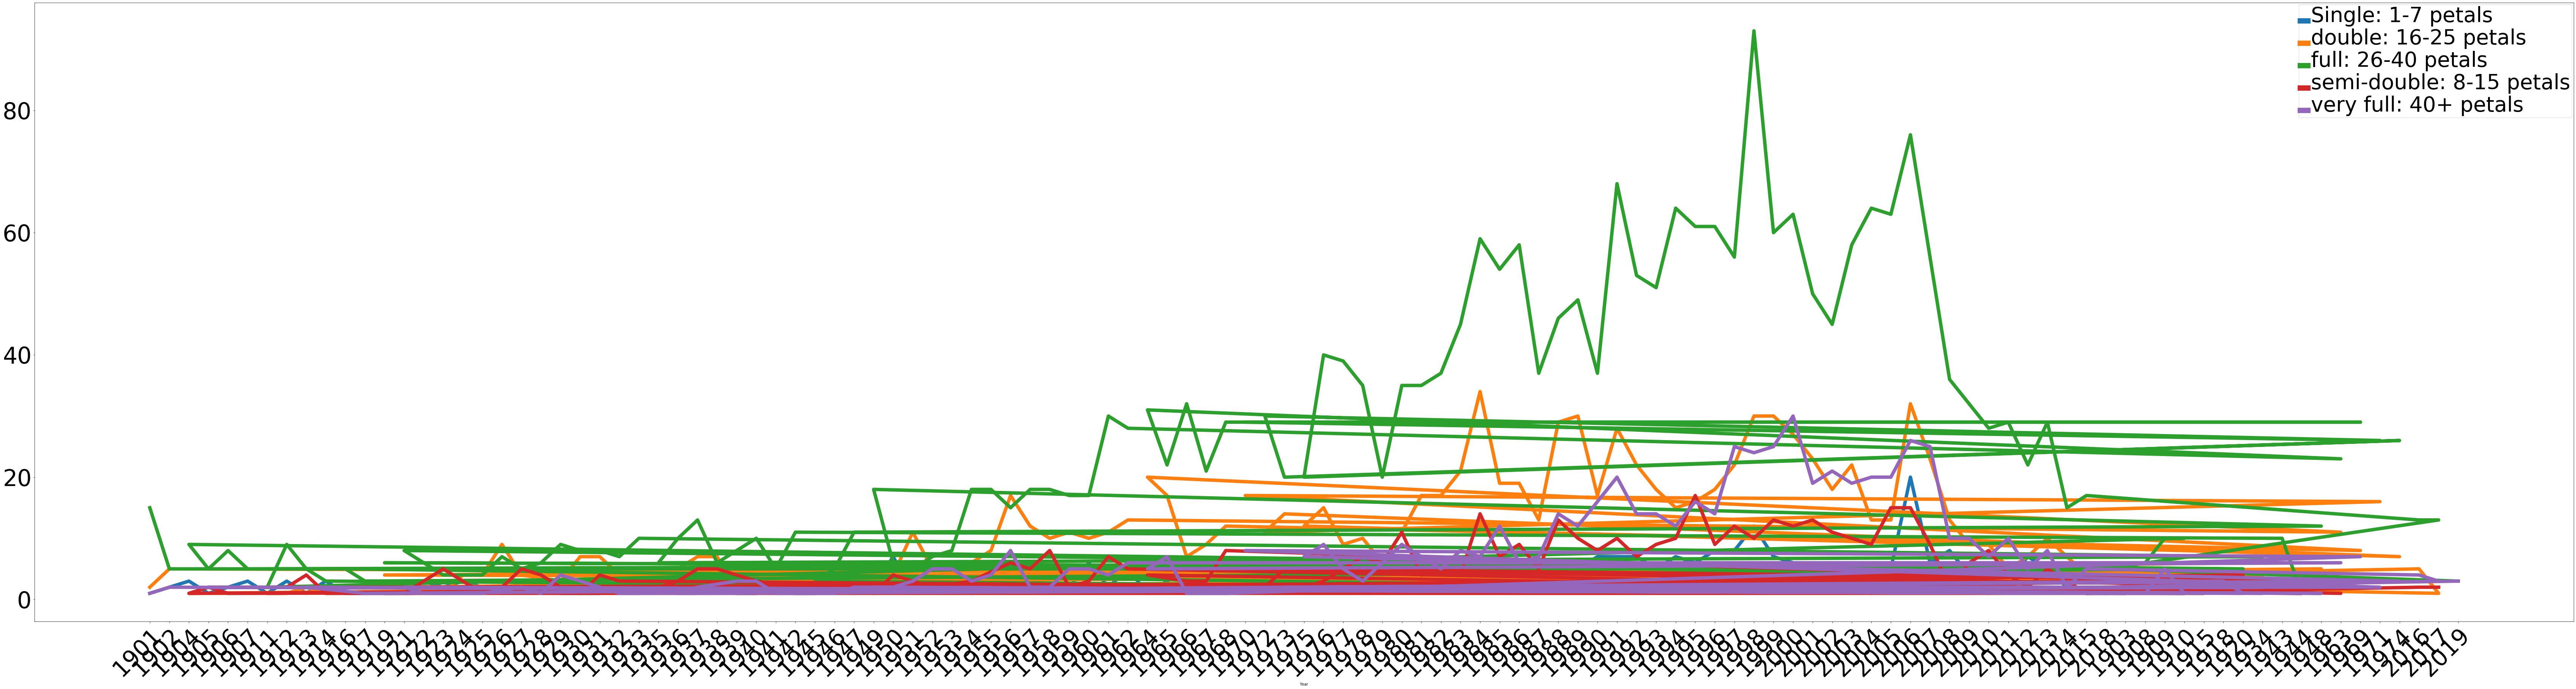

In [281]:
#creating line plot for petal count 
# period from 1900 till 2020

a4_dims = (120, 30)
fig, ax = plt.subplots(figsize=a4_dims)


p = sns.lineplot(ax=ax, data=petal_ctn_1900,  dashes = False, linewidth = 9)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize='60', ha="right",
             rotation_mode="anchor")

plt.setp(ax.get_yticklabels(), fontsize='60', ha="right",
             rotation_mode="anchor")

leg = ax.legend()

for line in leg.get_lines():
    line.set_linewidth(14)
    
plt.setp(ax.get_legend().get_texts(), fontsize='55') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title

p

In [282]:
ctn_cr['Year'] = ctn_cr['Year'].astype(int)
ctn_cr_1950 = ctn_cr[(ctn_cr['Year']  > 1950)]
petal_ctn_1950 = ctn_cr_1950.pivot("Year", "Petal count", "COUNT")
petal_ctn_1950

Petal count  Single: 1-7 petals  double: 16-25 petals  full: 26-40 petals  \
Year                                                                        
1951                        1.0                  11.0                 5.0   
1952                        2.0                   5.0                 7.0   
1953                        4.0                   4.0                 8.0   
1954                        1.0                   6.0                18.0   
1955                        3.0                   8.0                18.0   
1956                        5.0                  17.0                15.0   
1957                        4.0                  12.0                18.0   
1958                        2.0                  10.0                18.0   
1959                        2.0                  11.0                17.0   
1960                        6.0                  10.0                17.0   
1961                        2.0                  11.0                30.0   
1962                        5.0                  13.0                28.0   
1963                        NaN                  11.0                23.0   
1964                        1.0                  20.0                31.0   
1965                        3.0                  17.0                22.0   
1966                        5.0                   7.0                32.0   
1967                        1.0                   9.0                21.0   
1968                        2.0                  12.0                29.0   
1969                        NaN                   8.0                29.0   
1970                        3.0                  17.0                29.0   
1971                        NaN                  16.0                26.0   
1972                        1.0                  11.0                30.0   
1973                        2.0                  14.0                20.0   
1974                        NaN                   7.0                26.0   
1975                        4.0                  12.0                20.0   
1976                        2.0                  15.0                40.0   
1977                        2.0                   9.0                39.0   
1978                        3.0                  10.0                35.0   
1979                        3.0                   6.0                20.0   
1980                        4.0                  11.0                35.0   
1981                        3.0                  17.0                35.0   
1982                        6.0                  17.0                37.0   
1983                        7.0                  21.0                45.0   
1984                        1.0                  34.0                59.0   
1985                        2.0                  19.0                54.0   
1986                        5.0                  19.0                58.0   
1987                        5.0                  13.0                37.0   
1988                        4.0                  29.0                46.0   
1989                        5.0                  30.0                49.0   
1990                        7.0                  17.0                37.0   
1991                        7.0                  28.0                68.0   
1992                        7.0                  22.0                53.0   
1993                        5.0                  18.0                51.0   
1994                        7.0                  15.0                64.0   
1995                        6.0                  16.0                61.0   
1996                        8.0                  18.0                61.0   
1997                        8.0                  22.0                56.0   
1998                       12.0                  30.0                93.0   
1999                        7.0                  30.0                60.0   
2000                        6.0                  27.0                63.0

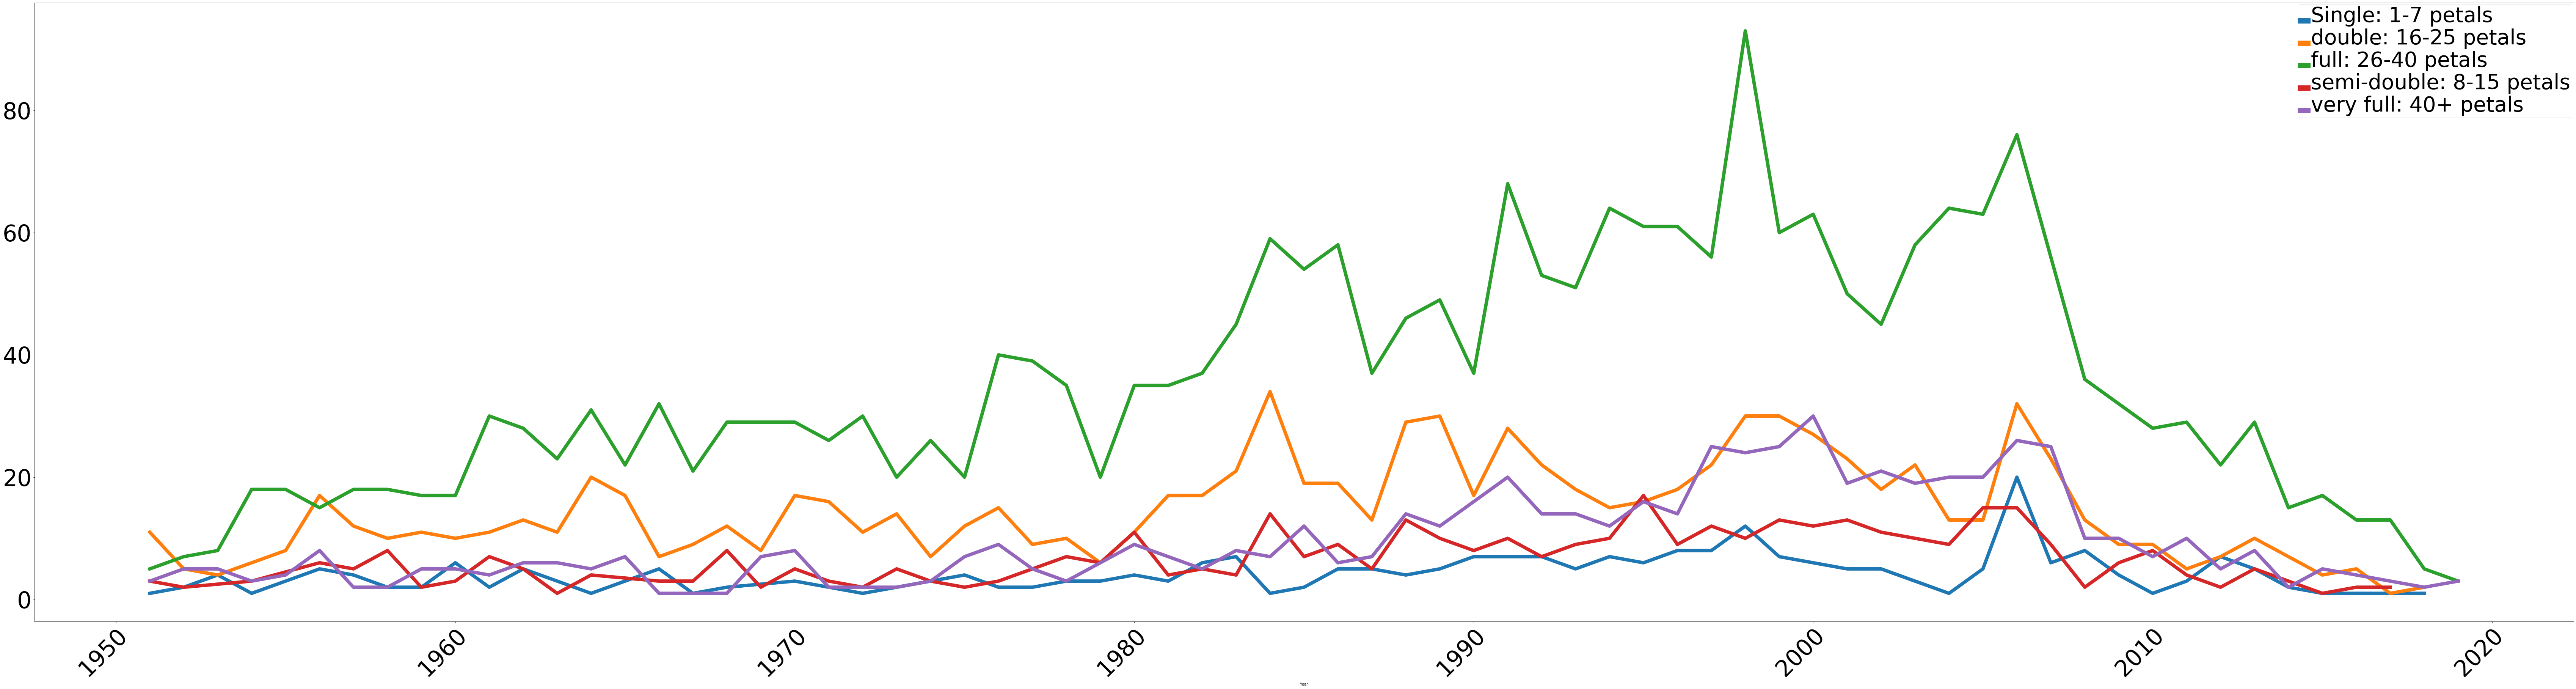

In [283]:
#creating line plot for petal count 
# period from 1950 till 2020

a4_dims = (120, 30)
fig, ax = plt.subplots(figsize=a4_dims)


p = sns.lineplot(ax=ax, data=petal_ctn_1950,  dashes = False, linewidth = 9)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize='60', ha="right",
             rotation_mode="anchor")

plt.setp(ax.get_yticklabels(), fontsize='60', ha="right",
             rotation_mode="anchor")

leg = ax.legend()

for line in leg.get_lines():
    line.set_linewidth(14)
    
plt.setp(ax.get_legend().get_texts(), fontsize='55') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title

p

We can see that after 1950 more roses with high petal count are being created. During this period full and double roses become especially popular. 

In [151]:
df.to_csv('garden_org_clean_data.csv')